## Fraud detection


In [1]:
# %load "g:/My Drive/fraud.py"
import pandas as pd
import numpy as np

df = pd.read_csv("../../../data/data/creditcard.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [2]:
df.shape

(284807, 31)

In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


normal=df[df['Class']==0]
fraud=df[df['Class']==1]

train_normal,test_normal = train_test_split(normal, 
                 test_size=.4,
                 random_state=42)


In [4]:
normal.shape, fraud.shape

((284315, 31), (492, 31))

In [5]:
X_train=train_normal.drop(columns='Class')

X_test=pd.concat([test_normal,fraud]).drop(columns='Class')
y_test=pd.concat([test_normal,fraud]).Class

In [6]:
# %load "g:/My Drive/diamonds_preproc.py"
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

normalizer=MinMaxScaler()

X_train_norm=normalizer.fit_transform(X_train)
X_test_norm=normalizer.transform(X_test)

## Autoencoder


In [7]:
input2=Input(shape=(X_train.shape[1]))

encoded=Dense(30, activation='elu')(input2)
encoded=Dense(16, activation='elu')(encoded)
encoded=Dense(8, activation='elu')(encoded)
encoded=Dense(4, activation='elu')(encoded)
encoded=Dense(2, activation='elu')(encoded)

decoded=Dense(2, activation='elu')(encoded)
decoded=Dense(4, activation='elu')(decoded)
decoded=Dense(8, activation='elu')(decoded)
decoded=Dense(16, activation='elu')(decoded)
decoded=Dense(30, activation='elu')(decoded)


In [8]:
X_train.shape

(170589, 30)

In [9]:
X_test.shape

(114218, 30)

In [10]:
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model

In [11]:
autoencoder=Model(input2, decoded)

autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense (Dense)               (None, 30)                930       
                                                                 
 dense_1 (Dense)             (None, 16)                496       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 2)                 10        
                                                                 
 dense_5 (Dense)             (None, 2)                 6     

In [12]:
encoder=Model(input2, encoded)

encoder.summary()

autoencoder.compile(optimizer='adam',loss='mse')

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense (Dense)               (None, 30)                930       
                                                                 
 dense_1 (Dense)             (None, 16)                496       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 2)                 10        
                                                                 
Total params: 1,608
Trainable params: 1,608
Non-trainable p

In [13]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense (Dense)               (None, 30)                930       
                                                                 
 dense_1 (Dense)             (None, 16)                496       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 2)                 10        
                                                                 
 dense_5 (Dense)             (None, 2)                 6     

In [14]:
from tensorflow import keras

cb=[keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)]

autoencoder.fit(X_train_norm,X_train_norm, batch_size=512, epochs=100, validation_split=.2, callbacks=cb)

Epoch 1/100
267/267 [==============================] - 6s 12ms/step - loss: 0.0501 - val_loss: 0.0048
Epoch 2/100
267/267 [==============================] - 3s 10ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 3/100
267/267 [==============================] - 3s 11ms/step - loss: 0.0042 - val_loss: 0.0036
Epoch 4/100
267/267 [==============================] - 3s 10ms/step - loss: 0.0029 - val_loss: 0.0025
Epoch 5/100
267/267 [==============================] - 3s 10ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 6/100
267/267 [==============================] - 3s 11ms/step - loss: 0.0023 - val_loss: 0.0023
Epoch 7/100
267/267 [==============================] - 3s 11ms/step - loss: 0.0023 - val_loss: 0.0023
Epoch 8/100
267/267 [==============================] - 3s 12ms/step - loss: 0.0023 - val_loss: 0.0023
Epoch 9/100
267/267 [==============================] - 3s 12ms/step - loss: 0.0022 - val_loss: 0.0023
Epoch 10/100
267/267 [==============================] - 3s 12ms/step - loss: 0.002

## Variational Autoencoder
![](graphs/vae.png)

### Reading
https://towardsdatascience.com/understanding-variational-autoencoders-vaes-f70510919f73
    

In [18]:
X_test_pred=autoencoder.predict(X_test_norm, batch_size=5000
                          )

23/23 [==============================] - 0s 4ms/step


In [19]:
X_test_pred

array([[0.47066635, 0.95832765, 0.793379  , ..., 0.6704565 , 0.25822556,
        0.0059883 ],
       [0.2969874 , 0.9549813 , 0.7926971 , ..., 0.6690907 , 0.25818586,
        0.00579197],
       [0.32597727, 0.95558006, 0.7931372 , ..., 0.66907877, 0.25804356,
        0.00581775],
       ...,
       [1.0018953 , 0.9612274 , 0.79051405, ..., 0.66499555, 0.25764892,
        0.00440385],
       [1.0041363 , 0.9609066 , 0.7907328 , ..., 0.66510767, 0.25734675,
        0.00413097],
       [0.9956648 , 0.96110314, 0.7897967 , ..., 0.6645626 , 0.25789145,
        0.00472773]], dtype=float32)

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
reconstruction_mse=((X_test_norm-X_test_pred)**2).mean(axis=1)

In [22]:
reconstruction_mse.shape

(114218,)

In [23]:
y_test==0

138028     True
63099      True
73411      True
164247     True
148999     True
          ...  
279863    False
280143    False
280149    False
281144    False
281674    False
Name: Class, Length: 114218, dtype: bool

In [24]:
normal_mse=reconstruction_mse[y_test==0]
fraud_mse=reconstruction_mse[y_test==1
                            ]

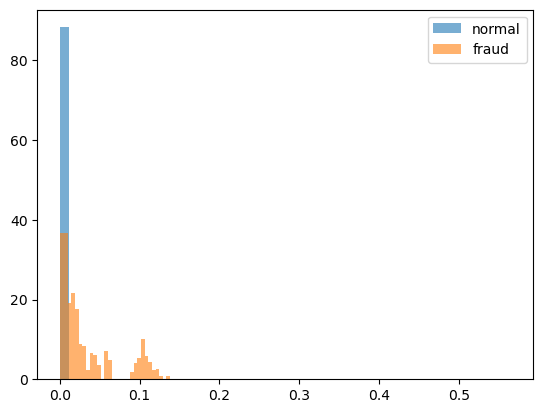

In [26]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.hist(normal_mse, label='normal', bins=50, density=True, alpha=.6)
plt.hist(fraud_mse, label='fraud',bins=30, density=True, alpha=.6)
plt.legend();

In [27]:
#jak stworzyc funkcje decyzji dla fraud
X_train_pred=autoencoder.predict(X_train_norm, batch_size=5000)
reconstruction_mse_train=((X_train_norm-X_train_pred)**2).mean(axis=1)


35/35 [==============================] - 0s 6ms/step


In [28]:
cutt_off=np.quantile(reconstruction_mse_train,.99)

In [29]:
cutt_off

0.006806553629472116

In [30]:
y_test_pred=np.where(reconstruction_mse>cutt_off,1,0)

In [31]:
from sklearn.metrics import confusion_matrix,roc_auc_score, average_precision_score
confusion_matrix(y_test,y_test_pred)

array([[112619,   1107],
       [   101,    391]], dtype=int64)

In [32]:
roc_auc_score(y_test,reconstruction_mse)

0.9461221443809675

In [33]:
average_precision_score(y_test,reconstruction_mse)

0.5641223692134402

In [34]:
def mad(mse):
    m=np.median(mse)
    ad=np.abs(mse-m)
    mad=np.median(ad)
    
    return .6745*ad/mad

z_score=mad(reconstruction_mse)
z_score

array([0.81337797, 0.87108736, 0.86190037, ..., 3.2691152 , 8.62118774,
       0.36550215])

In [35]:
y_test_pred=z_score>=3
confusion_matrix(y_test,y_test_pred)

array([[109035,   4691],
       [    71,    421]], dtype=int64)

In [177]:
## Variational Autoencoder - tutaj przestrzen latent, encodowanie do przstrzeni latent, samplowanie i z reprezentacji dekodowanie
#inna funkcja straty

    

In [198]:
# %load "g:/My Drive/vae.py"
from tensorflow.keras import backend as K
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape = (batch,dim))
    return z_mean + K.exp(.5*z_log_var)*epsilon
    

input_dim = X_train_norm.shape[1]
encoding_dim1 = 16
encoding_dim2 = 8
latent_dim = 2

#Autoencoder 
# 30-8-4-2-4-8-30

input_layer = Input(shape = (input_dim),name = "encoder_input")
encoded = Dense(encoding_dim1,activation="elu")(input_layer)
encoded = Dense(encoding_dim2,activation="elu")(encoded)

z_mean = Dense(latent_dim,name = "z_mean")(encoded)

z_log_var = Dense(latent_dim,name = "z_log_var")(encoded)

z = keras.layers.Lambda(sampling,
                        output_shape=(latent_dim,),
                        name = "z")([z_mean,z_log_var])
encoder = keras.Model(input_layer, [z_mean,z_log_var,z],name = "encoder")

# decoder

latent_input = Input(shape = (latent_dim),name = "z_sampling")
decoded = Dense(encoding_dim2,activation="elu")(latent_input)
decoded = Dense(encoding_dim1,activation="elu")(decoded)

output = Dense(input_dim,activation="elu")(decoded)

decoder = keras.Model(latent_input,output,name="decoder")
decoder.summary()

output = decoder(encoder(input_layer)[2] )
vae = keras.Model(input_layer, output)

# reconstruction
reconstruction_loss = keras.losses.mse(input_layer,output)

kl_loss = 1+z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5

vae_loss = K.mean(reconstruction_loss+kl_loss)
vae.add_loss(vae_loss)

vae.compile(optimizer="adam",loss = "mse")


Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 z_sampling (InputLayer)     [(None, 2)]               0         
                                                                 
 dense_141 (Dense)           (None, 8)                 24        
                                                                 
 dense_142 (Dense)           (None, 16)                144       
                                                                 
 dense_143 (Dense)           (None, 30)                510       
                                                                 
Total params: 678
Trainable params: 678
Non-trainable params: 0
_________________________________________________________________


In [199]:
vae.compile(optimizer='adam',loss='mse')

In [207]:
vae.fit(X_train_norm,X_train_norm, batch_size=512, epochs=50, validation_split=.2, callbacks=cb)

Epoch 1/50
267/267 [==============================] - 5s 17ms/step - loss: 0.0099 - val_loss: 0.0099
Epoch 2/50
267/267 [==============================] - 4s 17ms/step - loss: 0.0099 - val_loss: 0.0099
Epoch 3/50
267/267 [==============================] - 4s 17ms/step - loss: 0.0099 - val_loss: 0.0099
Epoch 4/50
267/267 [==============================] - 4s 14ms/step - loss: 0.0099 - val_loss: 0.0099
Epoch 5/50
267/267 [==============================] - 4s 15ms/step - loss: 0.0099 - val_loss: 0.0099
Epoch 6/50
267/267 [==============================] - 4s 15ms/step - loss: 0.0098 - val_loss: 0.0099
Epoch 7/50
267/267 [==============================] - 4s 16ms/step - loss: 0.0098 - val_loss: 0.0099
Epoch 8/50
267/267 [==============================] - 4s 15ms/step - loss: 0.0098 - val_loss: 0.0099
Epoch 9/50
267/267 [==============================] - 4s 15ms/step - loss: 0.0098 - val_loss: 0.0099
Epoch 10/50
267/267 [==============================] - 4s 15ms/step - loss: 0.0098 - val_lo

In [202]:
y_test_pred=vae.predict(X_test_norm,batch_size=128)

893/893 [==============================] - 3s 3ms/step


In [203]:
reconstruction_mse=((X_test_norm-X_test_pred)**2).mean(axis=1)

In [204]:
reconstruction_mse

array([0.00076832, 0.00072772, 0.00284082, ..., 0.00470064, 0.01031458,
       0.00134626])

In [205]:
y_test_pred=np.where(reconstruction_mse>cutt_off,1,0)

In [206]:
confusion_matrix(y_test,y_test_pred)

array([[112646,   1080],
       [   105,    387]], dtype=int64)

## Generative adversarial network
![](graphs/gan.png)


### About
- Generative adversarial networks (GANs) are one class of models that have been successfully used to model complex and high dimensional distributions
- Generative adversarial nets are alternative framework for training generative models in order to avoid the difficulty of approximating many intractable probabilistic computations
- Well Trained GANs to fit the distribution of normal samples should be able to reconstruct normal sample from latent representation and also differentiate the sample as coming from the true data distribution.


### How it works

![](graphs/mnist_gan.png)


### GAN Architecture
- GAN framework has the min-max game issue
- two players(Generator and Discriminator) always competes against each other
- the discriminator generates outputs a value D(x) indicating the chance that x is a real image and the main objective is to increase the chance to recognize real image as real and generated images as fake
- To measure the loss, we use cross-entropy.

#### Generative Network
A generator network takes a fixed-length random vector (starting with
random noise) and generates a new sample. It uses a Gaussian distribution
to generate new samples and usually starts with a one-dimensional layer,
which is reshaped into the shape of the training data samples in the end.
For example, if we use the MNIST dataset to generate images, the output
layer of the generator network must correspond to the image dimensions
(e.g., 28 x 28 x 1). This final layer is also referred to as latent space or vector
space.

- The objective function of generator side wants the model to generate images with the highest possible value discriminator so that it can fool the discriminator.
![](graphs/gen_fun.jpeg)


#### Discriminator Network
A discriminator network works in a relatively reversed order. The output
of the generative network is used as input data in the discriminator
network (e.g., 28 x 28 x 1). The main task of a discriminator network is to
decide if the generated sample is authentic or not. Therefore, the output
of a discriminator network is provided by a single neuron dense layer
outputting the probability (e.g., 0.6475) of the authenticity of the generated
sample.
![](graphs/cross_ent.jpeg)
#### Latent Space

Latent space (i.e.,vector space) functions as the generator network's output
and the discriminator network's input. The latent space in a generative
adversarial model usually has the shape of the original training dataset
samples. Latent Space tries to catch the characteristic features of the
training dataset so that the generator may successfully generate close to
authentic samples.

### GAN for Anomaly detection
https://arxiv.org/pdf/1809.10816.pdf
https://arxiv.org/pdf/1906.11632.pdf





In [ ]:
def mad(mse):
    

In [208]:
!pip install pyod #biblioteka do detekcji anomalii outl dete

     ------------------------------------ 147.7/147.7 kB 799.4 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyod: filename=pyod-1.0.7-py3-none-any.whl size=181085 sha256=ee1b1ade52492c6c36b878628f55687dcd4c20f10604e621c73e1d939b76841c
  Stored in directory: c:\users\paperspace\appdata\local\pip\cache\wheels\52\cc\91\ef5e1c6ec2d8e430fc2719effa017d9bb98d2a54d671e93228
Successfully built pyod


In [210]:
from pyod.models.so_gaal import SO_GAAL

detector=SO_GAAL(contamination=.005)
detector.fit(X_train_norm)

C:\Users\paperspace\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1 of 60

Testing for epoch 1 index 1:

Testing for epoch 1 index 2:

Testing for epoch 1 index 3:

Testing for epoch 1 index 4:

Testing for epoch 1 index 5:

Testing for epoch 1 index 6:

Testing for epoch 1 index 7:

Testing for epoch 1 index 8:

Testing for epoch 1 index 9:

Testing for epoch 1 index 10:

Testing for epoch 1 index 11:

Testing for epoch 1 index 12:

Testing for epoch 1 index 13:

Testing for epoch 1 index 14:

Testing for epoch 1 index 15:

Testing for epoch 1 index 16:

Testing for epoch 1 index 17:

Testing for epoch 1 index 18:

Testing for epoch 1 index 19:

Testing for epoch 1 index 20:

Testing for epoch 1 index 21:

Testing for epoch 1 index 22:

Testing for epoch 1 index 23:

Testing for epoch 1 index 24:

Testing for epoch 1 index 25:

Testing for epoch 1 index 26:

Testing for epoch 1 index 27:

Testing for epoch 1 index 28:

Testing for epoch 1 index 29:

Testing for epoch 1 index 30:

Testing for epoch 1 index 31:

Testing for epoch 1 index 32:

Te


Testing for epoch 1 index 260:

Testing for epoch 1 index 261:

Testing for epoch 1 index 262:

Testing for epoch 1 index 263:

Testing for epoch 1 index 264:

Testing for epoch 1 index 265:

Testing for epoch 1 index 266:

Testing for epoch 1 index 267:

Testing for epoch 1 index 268:

Testing for epoch 1 index 269:

Testing for epoch 1 index 270:

Testing for epoch 1 index 271:

Testing for epoch 1 index 272:

Testing for epoch 1 index 273:

Testing for epoch 1 index 274:

Testing for epoch 1 index 275:

Testing for epoch 1 index 276:

Testing for epoch 1 index 277:

Testing for epoch 1 index 278:

Testing for epoch 1 index 279:

Testing for epoch 1 index 280:

Testing for epoch 1 index 281:

Testing for epoch 1 index 282:

Testing for epoch 1 index 283:

Testing for epoch 1 index 284:

Testing for epoch 1 index 285:

Testing for epoch 1 index 286:

Testing for epoch 1 index 287:

Testing for epoch 1 index 288:

Testing for epoch 1 index 289:

Testing for epoch 1 index 290:

Testing


Testing for epoch 2 index 179:

Testing for epoch 2 index 180:

Testing for epoch 2 index 181:

Testing for epoch 2 index 182:

Testing for epoch 2 index 183:

Testing for epoch 2 index 184:

Testing for epoch 2 index 185:

Testing for epoch 2 index 186:

Testing for epoch 2 index 187:

Testing for epoch 2 index 188:

Testing for epoch 2 index 189:

Testing for epoch 2 index 190:

Testing for epoch 2 index 191:

Testing for epoch 2 index 192:

Testing for epoch 2 index 193:

Testing for epoch 2 index 194:

Testing for epoch 2 index 195:

Testing for epoch 2 index 196:

Testing for epoch 2 index 197:

Testing for epoch 2 index 198:

Testing for epoch 2 index 199:

Testing for epoch 2 index 200:

Testing for epoch 2 index 201:

Testing for epoch 2 index 202:

Testing for epoch 2 index 203:

Testing for epoch 2 index 204:

Testing for epoch 2 index 205:

Testing for epoch 2 index 206:

Testing for epoch 2 index 207:

Testing for epoch 2 index 208:

Testing for epoch 2 index 209:

Testing


Testing for epoch 3 index 98:

Testing for epoch 3 index 99:

Testing for epoch 3 index 100:

Testing for epoch 3 index 101:

Testing for epoch 3 index 102:

Testing for epoch 3 index 103:

Testing for epoch 3 index 104:

Testing for epoch 3 index 105:

Testing for epoch 3 index 106:

Testing for epoch 3 index 107:

Testing for epoch 3 index 108:

Testing for epoch 3 index 109:

Testing for epoch 3 index 110:

Testing for epoch 3 index 111:

Testing for epoch 3 index 112:

Testing for epoch 3 index 113:

Testing for epoch 3 index 114:

Testing for epoch 3 index 115:

Testing for epoch 3 index 116:

Testing for epoch 3 index 117:

Testing for epoch 3 index 118:

Testing for epoch 3 index 119:

Testing for epoch 3 index 120:

Testing for epoch 3 index 121:

Testing for epoch 3 index 122:

Testing for epoch 3 index 123:

Testing for epoch 3 index 124:

Testing for epoch 3 index 125:

Testing for epoch 3 index 126:

Testing for epoch 3 index 127:

Testing for epoch 3 index 128:

Testing f


Testing for epoch 4 index 15:

Testing for epoch 4 index 16:

Testing for epoch 4 index 17:

Testing for epoch 4 index 18:

Testing for epoch 4 index 19:

Testing for epoch 4 index 20:

Testing for epoch 4 index 21:

Testing for epoch 4 index 22:

Testing for epoch 4 index 23:

Testing for epoch 4 index 24:

Testing for epoch 4 index 25:

Testing for epoch 4 index 26:

Testing for epoch 4 index 27:

Testing for epoch 4 index 28:

Testing for epoch 4 index 29:

Testing for epoch 4 index 30:

Testing for epoch 4 index 31:

Testing for epoch 4 index 32:

Testing for epoch 4 index 33:

Testing for epoch 4 index 34:

Testing for epoch 4 index 35:

Testing for epoch 4 index 36:

Testing for epoch 4 index 37:

Testing for epoch 4 index 38:

Testing for epoch 4 index 39:

Testing for epoch 4 index 40:

Testing for epoch 4 index 41:

Testing for epoch 4 index 42:

Testing for epoch 4 index 43:

Testing for epoch 4 index 44:

Testing for epoch 4 index 45:

Testing for epoch 4 index 46:

Testing


Testing for epoch 4 index 275:

Testing for epoch 4 index 276:

Testing for epoch 4 index 277:

Testing for epoch 4 index 278:

Testing for epoch 4 index 279:

Testing for epoch 4 index 280:

Testing for epoch 4 index 281:

Testing for epoch 4 index 282:

Testing for epoch 4 index 283:

Testing for epoch 4 index 284:

Testing for epoch 4 index 285:

Testing for epoch 4 index 286:

Testing for epoch 4 index 287:

Testing for epoch 4 index 288:

Testing for epoch 4 index 289:

Testing for epoch 4 index 290:

Testing for epoch 4 index 291:

Testing for epoch 4 index 292:

Testing for epoch 4 index 293:

Testing for epoch 4 index 294:

Testing for epoch 4 index 295:

Testing for epoch 4 index 296:

Testing for epoch 4 index 297:

Testing for epoch 4 index 298:

Testing for epoch 4 index 299:

Testing for epoch 4 index 300:

Testing for epoch 4 index 301:

Testing for epoch 4 index 302:

Testing for epoch 4 index 303:

Testing for epoch 4 index 304:

Testing for epoch 4 index 305:

Testing


Testing for epoch 5 index 194:

Testing for epoch 5 index 195:

Testing for epoch 5 index 196:

Testing for epoch 5 index 197:

Testing for epoch 5 index 198:

Testing for epoch 5 index 199:

Testing for epoch 5 index 200:

Testing for epoch 5 index 201:

Testing for epoch 5 index 202:

Testing for epoch 5 index 203:

Testing for epoch 5 index 204:

Testing for epoch 5 index 205:

Testing for epoch 5 index 206:

Testing for epoch 5 index 207:

Testing for epoch 5 index 208:

Testing for epoch 5 index 209:

Testing for epoch 5 index 210:

Testing for epoch 5 index 211:

Testing for epoch 5 index 212:

Testing for epoch 5 index 213:

Testing for epoch 5 index 214:

Testing for epoch 5 index 215:

Testing for epoch 5 index 216:

Testing for epoch 5 index 217:

Testing for epoch 5 index 218:

Testing for epoch 5 index 219:

Testing for epoch 5 index 220:

Testing for epoch 5 index 221:

Testing for epoch 5 index 222:

Testing for epoch 5 index 223:

Testing for epoch 5 index 224:

Testing


Testing for epoch 6 index 112:

Testing for epoch 6 index 113:

Testing for epoch 6 index 114:

Testing for epoch 6 index 115:

Testing for epoch 6 index 116:

Testing for epoch 6 index 117:

Testing for epoch 6 index 118:

Testing for epoch 6 index 119:

Testing for epoch 6 index 120:

Testing for epoch 6 index 121:

Testing for epoch 6 index 122:

Testing for epoch 6 index 123:

Testing for epoch 6 index 124:

Testing for epoch 6 index 125:

Testing for epoch 6 index 126:

Testing for epoch 6 index 127:

Testing for epoch 6 index 128:

Testing for epoch 6 index 129:

Testing for epoch 6 index 130:

Testing for epoch 6 index 131:

Testing for epoch 6 index 132:

Testing for epoch 6 index 133:

Testing for epoch 6 index 134:

Testing for epoch 6 index 135:

Testing for epoch 6 index 136:

Testing for epoch 6 index 137:

Testing for epoch 6 index 138:

Testing for epoch 6 index 139:

Testing for epoch 6 index 140:

Testing for epoch 6 index 141:

Testing for epoch 6 index 142:

Testing


Testing for epoch 7 index 29:

Testing for epoch 7 index 30:

Testing for epoch 7 index 31:

Testing for epoch 7 index 32:

Testing for epoch 7 index 33:

Testing for epoch 7 index 34:

Testing for epoch 7 index 35:

Testing for epoch 7 index 36:

Testing for epoch 7 index 37:

Testing for epoch 7 index 38:

Testing for epoch 7 index 39:

Testing for epoch 7 index 40:

Testing for epoch 7 index 41:

Testing for epoch 7 index 42:

Testing for epoch 7 index 43:

Testing for epoch 7 index 44:

Testing for epoch 7 index 45:

Testing for epoch 7 index 46:

Testing for epoch 7 index 47:

Testing for epoch 7 index 48:

Testing for epoch 7 index 49:

Testing for epoch 7 index 50:

Testing for epoch 7 index 51:

Testing for epoch 7 index 52:

Testing for epoch 7 index 53:

Testing for epoch 7 index 54:

Testing for epoch 7 index 55:

Testing for epoch 7 index 56:

Testing for epoch 7 index 57:

Testing for epoch 7 index 58:

Testing for epoch 7 index 59:

Testing for epoch 7 index 60:

Testing


Testing for epoch 7 index 289:

Testing for epoch 7 index 290:

Testing for epoch 7 index 291:

Testing for epoch 7 index 292:

Testing for epoch 7 index 293:

Testing for epoch 7 index 294:

Testing for epoch 7 index 295:

Testing for epoch 7 index 296:

Testing for epoch 7 index 297:

Testing for epoch 7 index 298:

Testing for epoch 7 index 299:

Testing for epoch 7 index 300:

Testing for epoch 7 index 301:

Testing for epoch 7 index 302:

Testing for epoch 7 index 303:

Testing for epoch 7 index 304:

Testing for epoch 7 index 305:

Testing for epoch 7 index 306:

Testing for epoch 7 index 307:

Testing for epoch 7 index 308:

Testing for epoch 7 index 309:

Testing for epoch 7 index 310:

Testing for epoch 7 index 311:

Testing for epoch 7 index 312:

Testing for epoch 7 index 313:

Testing for epoch 7 index 314:

Testing for epoch 7 index 315:

Testing for epoch 7 index 316:

Testing for epoch 7 index 317:

Testing for epoch 7 index 318:

Testing for epoch 7 index 319:

Testing


Testing for epoch 8 index 208:

Testing for epoch 8 index 209:

Testing for epoch 8 index 210:

Testing for epoch 8 index 211:

Testing for epoch 8 index 212:

Testing for epoch 8 index 213:

Testing for epoch 8 index 214:

Testing for epoch 8 index 215:

Testing for epoch 8 index 216:

Testing for epoch 8 index 217:

Testing for epoch 8 index 218:

Testing for epoch 8 index 219:

Testing for epoch 8 index 220:

Testing for epoch 8 index 221:

Testing for epoch 8 index 222:

Testing for epoch 8 index 223:

Testing for epoch 8 index 224:

Testing for epoch 8 index 225:

Testing for epoch 8 index 226:

Testing for epoch 8 index 227:

Testing for epoch 8 index 228:

Testing for epoch 8 index 229:

Testing for epoch 8 index 230:

Testing for epoch 8 index 231:

Testing for epoch 8 index 232:

Testing for epoch 8 index 233:

Testing for epoch 8 index 234:

Testing for epoch 8 index 235:

Testing for epoch 8 index 236:

Testing for epoch 8 index 237:

Testing for epoch 8 index 238:

Testing


Testing for epoch 9 index 127:

Testing for epoch 9 index 128:

Testing for epoch 9 index 129:

Testing for epoch 9 index 130:

Testing for epoch 9 index 131:

Testing for epoch 9 index 132:

Testing for epoch 9 index 133:

Testing for epoch 9 index 134:

Testing for epoch 9 index 135:

Testing for epoch 9 index 136:

Testing for epoch 9 index 137:

Testing for epoch 9 index 138:

Testing for epoch 9 index 139:

Testing for epoch 9 index 140:

Testing for epoch 9 index 141:

Testing for epoch 9 index 142:

Testing for epoch 9 index 143:

Testing for epoch 9 index 144:

Testing for epoch 9 index 145:

Testing for epoch 9 index 146:

Testing for epoch 9 index 147:

Testing for epoch 9 index 148:

Testing for epoch 9 index 149:

Testing for epoch 9 index 150:

Testing for epoch 9 index 151:

Testing for epoch 9 index 152:

Testing for epoch 9 index 153:

Testing for epoch 9 index 154:

Testing for epoch 9 index 155:

Testing for epoch 9 index 156:

Testing for epoch 9 index 157:

Testing


Testing for epoch 10 index 43:

Testing for epoch 10 index 44:

Testing for epoch 10 index 45:

Testing for epoch 10 index 46:

Testing for epoch 10 index 47:

Testing for epoch 10 index 48:

Testing for epoch 10 index 49:

Testing for epoch 10 index 50:

Testing for epoch 10 index 51:

Testing for epoch 10 index 52:

Testing for epoch 10 index 53:

Testing for epoch 10 index 54:

Testing for epoch 10 index 55:

Testing for epoch 10 index 56:

Testing for epoch 10 index 57:

Testing for epoch 10 index 58:

Testing for epoch 10 index 59:

Testing for epoch 10 index 60:

Testing for epoch 10 index 61:

Testing for epoch 10 index 62:

Testing for epoch 10 index 63:

Testing for epoch 10 index 64:

Testing for epoch 10 index 65:

Testing for epoch 10 index 66:

Testing for epoch 10 index 67:

Testing for epoch 10 index 68:

Testing for epoch 10 index 69:

Testing for epoch 10 index 70:

Testing for epoch 10 index 71:

Testing for epoch 10 index 72:

Testing for epoch 10 index 73:

Testing


Testing for epoch 10 index 294:

Testing for epoch 10 index 295:

Testing for epoch 10 index 296:

Testing for epoch 10 index 297:

Testing for epoch 10 index 298:

Testing for epoch 10 index 299:

Testing for epoch 10 index 300:

Testing for epoch 10 index 301:

Testing for epoch 10 index 302:

Testing for epoch 10 index 303:

Testing for epoch 10 index 304:

Testing for epoch 10 index 305:

Testing for epoch 10 index 306:

Testing for epoch 10 index 307:

Testing for epoch 10 index 308:

Testing for epoch 10 index 309:

Testing for epoch 10 index 310:

Testing for epoch 10 index 311:

Testing for epoch 10 index 312:

Testing for epoch 10 index 313:

Testing for epoch 10 index 314:

Testing for epoch 10 index 315:

Testing for epoch 10 index 316:

Testing for epoch 10 index 317:

Testing for epoch 10 index 318:

Testing for epoch 10 index 319:

Testing for epoch 10 index 320:

Testing for epoch 10 index 321:

Testing for epoch 10 index 322:

Testing for epoch 10 index 323:

Testing f


Testing for epoch 11 index 206:

Testing for epoch 11 index 207:

Testing for epoch 11 index 208:

Testing for epoch 11 index 209:

Testing for epoch 11 index 210:

Testing for epoch 11 index 211:

Testing for epoch 11 index 212:

Testing for epoch 11 index 213:

Testing for epoch 11 index 214:

Testing for epoch 11 index 215:

Testing for epoch 11 index 216:

Testing for epoch 11 index 217:

Testing for epoch 11 index 218:

Testing for epoch 11 index 219:

Testing for epoch 11 index 220:

Testing for epoch 11 index 221:

Testing for epoch 11 index 222:

Testing for epoch 11 index 223:

Testing for epoch 11 index 224:

Testing for epoch 11 index 225:

Testing for epoch 11 index 226:

Testing for epoch 11 index 227:

Testing for epoch 11 index 228:

Testing for epoch 11 index 229:

Testing for epoch 11 index 230:

Testing for epoch 11 index 231:

Testing for epoch 11 index 232:

Testing for epoch 11 index 233:

Testing for epoch 11 index 234:

Testing for epoch 11 index 235:

Testing f


Testing for epoch 12 index 118:

Testing for epoch 12 index 119:

Testing for epoch 12 index 120:

Testing for epoch 12 index 121:

Testing for epoch 12 index 122:

Testing for epoch 12 index 123:

Testing for epoch 12 index 124:

Testing for epoch 12 index 125:

Testing for epoch 12 index 126:

Testing for epoch 12 index 127:

Testing for epoch 12 index 128:

Testing for epoch 12 index 129:

Testing for epoch 12 index 130:

Testing for epoch 12 index 131:

Testing for epoch 12 index 132:

Testing for epoch 12 index 133:

Testing for epoch 12 index 134:

Testing for epoch 12 index 135:

Testing for epoch 12 index 136:

Testing for epoch 12 index 137:

Testing for epoch 12 index 138:

Testing for epoch 12 index 139:

Testing for epoch 12 index 140:

Testing for epoch 12 index 141:

Testing for epoch 12 index 142:

Testing for epoch 12 index 143:

Testing for epoch 12 index 144:

Testing for epoch 12 index 145:

Testing for epoch 12 index 146:

Testing for epoch 12 index 147:

Testing f


Testing for epoch 13 index 27:

Testing for epoch 13 index 28:

Testing for epoch 13 index 29:

Testing for epoch 13 index 30:

Testing for epoch 13 index 31:

Testing for epoch 13 index 32:

Testing for epoch 13 index 33:

Testing for epoch 13 index 34:

Testing for epoch 13 index 35:

Testing for epoch 13 index 36:

Testing for epoch 13 index 37:

Testing for epoch 13 index 38:

Testing for epoch 13 index 39:

Testing for epoch 13 index 40:

Testing for epoch 13 index 41:

Testing for epoch 13 index 42:

Testing for epoch 13 index 43:

Testing for epoch 13 index 44:

Testing for epoch 13 index 45:

Testing for epoch 13 index 46:

Testing for epoch 13 index 47:

Testing for epoch 13 index 48:

Testing for epoch 13 index 49:

Testing for epoch 13 index 50:

Testing for epoch 13 index 51:

Testing for epoch 13 index 52:

Testing for epoch 13 index 53:

Testing for epoch 13 index 54:

Testing for epoch 13 index 55:

Testing for epoch 13 index 56:

Testing for epoch 13 index 57:

Testing


Testing for epoch 13 index 279:

Testing for epoch 13 index 280:

Testing for epoch 13 index 281:

Testing for epoch 13 index 282:

Testing for epoch 13 index 283:

Testing for epoch 13 index 284:

Testing for epoch 13 index 285:

Testing for epoch 13 index 286:

Testing for epoch 13 index 287:

Testing for epoch 13 index 288:

Testing for epoch 13 index 289:

Testing for epoch 13 index 290:

Testing for epoch 13 index 291:

Testing for epoch 13 index 292:

Testing for epoch 13 index 293:

Testing for epoch 13 index 294:

Testing for epoch 13 index 295:

Testing for epoch 13 index 296:

Testing for epoch 13 index 297:

Testing for epoch 13 index 298:

Testing for epoch 13 index 299:

Testing for epoch 13 index 300:

Testing for epoch 13 index 301:

Testing for epoch 13 index 302:

Testing for epoch 13 index 303:

Testing for epoch 13 index 304:

Testing for epoch 13 index 305:

Testing for epoch 13 index 306:

Testing for epoch 13 index 307:

Testing for epoch 13 index 308:

Testing f


Testing for epoch 14 index 190:

Testing for epoch 14 index 191:

Testing for epoch 14 index 192:

Testing for epoch 14 index 193:

Testing for epoch 14 index 194:

Testing for epoch 14 index 195:

Testing for epoch 14 index 196:

Testing for epoch 14 index 197:

Testing for epoch 14 index 198:

Testing for epoch 14 index 199:

Testing for epoch 14 index 200:

Testing for epoch 14 index 201:

Testing for epoch 14 index 202:

Testing for epoch 14 index 203:

Testing for epoch 14 index 204:

Testing for epoch 14 index 205:

Testing for epoch 14 index 206:

Testing for epoch 14 index 207:

Testing for epoch 14 index 208:

Testing for epoch 14 index 209:

Testing for epoch 14 index 210:

Testing for epoch 14 index 211:

Testing for epoch 14 index 212:

Testing for epoch 14 index 213:

Testing for epoch 14 index 214:

Testing for epoch 14 index 215:

Testing for epoch 14 index 216:

Testing for epoch 14 index 217:

Testing for epoch 14 index 218:

Testing for epoch 14 index 219:

Testing f


Testing for epoch 15 index 101:

Testing for epoch 15 index 102:

Testing for epoch 15 index 103:

Testing for epoch 15 index 104:

Testing for epoch 15 index 105:

Testing for epoch 15 index 106:

Testing for epoch 15 index 107:

Testing for epoch 15 index 108:

Testing for epoch 15 index 109:

Testing for epoch 15 index 110:

Testing for epoch 15 index 111:

Testing for epoch 15 index 112:

Testing for epoch 15 index 113:

Testing for epoch 15 index 114:

Testing for epoch 15 index 115:

Testing for epoch 15 index 116:

Testing for epoch 15 index 117:

Testing for epoch 15 index 118:

Testing for epoch 15 index 119:

Testing for epoch 15 index 120:

Testing for epoch 15 index 121:

Testing for epoch 15 index 122:

Testing for epoch 15 index 123:

Testing for epoch 15 index 124:

Testing for epoch 15 index 125:

Testing for epoch 15 index 126:

Testing for epoch 15 index 127:

Testing for epoch 15 index 128:

Testing for epoch 15 index 129:

Testing for epoch 15 index 130:

Testing f


Testing for epoch 16 index 10:

Testing for epoch 16 index 11:

Testing for epoch 16 index 12:

Testing for epoch 16 index 13:

Testing for epoch 16 index 14:

Testing for epoch 16 index 15:

Testing for epoch 16 index 16:

Testing for epoch 16 index 17:

Testing for epoch 16 index 18:

Testing for epoch 16 index 19:

Testing for epoch 16 index 20:

Testing for epoch 16 index 21:

Testing for epoch 16 index 22:

Testing for epoch 16 index 23:

Testing for epoch 16 index 24:

Testing for epoch 16 index 25:

Testing for epoch 16 index 26:

Testing for epoch 16 index 27:

Testing for epoch 16 index 28:

Testing for epoch 16 index 29:

Testing for epoch 16 index 30:

Testing for epoch 16 index 31:

Testing for epoch 16 index 32:

Testing for epoch 16 index 33:

Testing for epoch 16 index 34:

Testing for epoch 16 index 35:

Testing for epoch 16 index 36:

Testing for epoch 16 index 37:

Testing for epoch 16 index 38:

Testing for epoch 16 index 39:

Testing for epoch 16 index 40:

Testing


Testing for epoch 16 index 262:

Testing for epoch 16 index 263:

Testing for epoch 16 index 264:

Testing for epoch 16 index 265:

Testing for epoch 16 index 266:

Testing for epoch 16 index 267:

Testing for epoch 16 index 268:

Testing for epoch 16 index 269:

Testing for epoch 16 index 270:

Testing for epoch 16 index 271:

Testing for epoch 16 index 272:

Testing for epoch 16 index 273:

Testing for epoch 16 index 274:

Testing for epoch 16 index 275:

Testing for epoch 16 index 276:

Testing for epoch 16 index 277:

Testing for epoch 16 index 278:

Testing for epoch 16 index 279:

Testing for epoch 16 index 280:

Testing for epoch 16 index 281:

Testing for epoch 16 index 282:

Testing for epoch 16 index 283:

Testing for epoch 16 index 284:

Testing for epoch 16 index 285:

Testing for epoch 16 index 286:

Testing for epoch 16 index 287:

Testing for epoch 16 index 288:

Testing for epoch 16 index 289:

Testing for epoch 16 index 290:

Testing for epoch 16 index 291:

Testing f


Testing for epoch 17 index 173:

Testing for epoch 17 index 174:

Testing for epoch 17 index 175:

Testing for epoch 17 index 176:

Testing for epoch 17 index 177:

Testing for epoch 17 index 178:

Testing for epoch 17 index 179:

Testing for epoch 17 index 180:

Testing for epoch 17 index 181:

Testing for epoch 17 index 182:

Testing for epoch 17 index 183:

Testing for epoch 17 index 184:

Testing for epoch 17 index 185:

Testing for epoch 17 index 186:

Testing for epoch 17 index 187:

Testing for epoch 17 index 188:

Testing for epoch 17 index 189:

Testing for epoch 17 index 190:

Testing for epoch 17 index 191:

Testing for epoch 17 index 192:

Testing for epoch 17 index 193:

Testing for epoch 17 index 194:

Testing for epoch 17 index 195:

Testing for epoch 17 index 196:

Testing for epoch 17 index 197:

Testing for epoch 17 index 198:

Testing for epoch 17 index 199:

Testing for epoch 17 index 200:

Testing for epoch 17 index 201:

Testing for epoch 17 index 202:

Testing f


Testing for epoch 18 index 83:

Testing for epoch 18 index 84:

Testing for epoch 18 index 85:

Testing for epoch 18 index 86:

Testing for epoch 18 index 87:

Testing for epoch 18 index 88:

Testing for epoch 18 index 89:

Testing for epoch 18 index 90:

Testing for epoch 18 index 91:

Testing for epoch 18 index 92:

Testing for epoch 18 index 93:

Testing for epoch 18 index 94:

Testing for epoch 18 index 95:

Testing for epoch 18 index 96:

Testing for epoch 18 index 97:

Testing for epoch 18 index 98:

Testing for epoch 18 index 99:

Testing for epoch 18 index 100:

Testing for epoch 18 index 101:

Testing for epoch 18 index 102:

Testing for epoch 18 index 103:

Testing for epoch 18 index 104:

Testing for epoch 18 index 105:

Testing for epoch 18 index 106:

Testing for epoch 18 index 107:

Testing for epoch 18 index 108:

Testing for epoch 18 index 109:

Testing for epoch 18 index 110:

Testing for epoch 18 index 111:

Testing for epoch 18 index 112:

Testing for epoch 18 index


Testing for epoch 18 index 333:

Testing for epoch 18 index 334:

Testing for epoch 18 index 335:

Testing for epoch 18 index 336:

Testing for epoch 18 index 337:

Testing for epoch 18 index 338:

Testing for epoch 18 index 339:

Testing for epoch 18 index 340:

Testing for epoch 18 index 341:
Epoch 19 of 60

Testing for epoch 19 index 1:

Testing for epoch 19 index 2:

Testing for epoch 19 index 3:

Testing for epoch 19 index 4:

Testing for epoch 19 index 5:

Testing for epoch 19 index 6:

Testing for epoch 19 index 7:

Testing for epoch 19 index 8:

Testing for epoch 19 index 9:

Testing for epoch 19 index 10:

Testing for epoch 19 index 11:

Testing for epoch 19 index 12:

Testing for epoch 19 index 13:

Testing for epoch 19 index 14:

Testing for epoch 19 index 15:

Testing for epoch 19 index 16:

Testing for epoch 19 index 17:

Testing for epoch 19 index 18:

Testing for epoch 19 index 19:

Testing for epoch 19 index 20:

Testing for epoch 19 index 21:

Testing for epoch 19 ind


Testing for epoch 19 index 244:

Testing for epoch 19 index 245:

Testing for epoch 19 index 246:

Testing for epoch 19 index 247:

Testing for epoch 19 index 248:

Testing for epoch 19 index 249:

Testing for epoch 19 index 250:

Testing for epoch 19 index 251:

Testing for epoch 19 index 252:

Testing for epoch 19 index 253:

Testing for epoch 19 index 254:

Testing for epoch 19 index 255:

Testing for epoch 19 index 256:

Testing for epoch 19 index 257:

Testing for epoch 19 index 258:

Testing for epoch 19 index 259:

Testing for epoch 19 index 260:

Testing for epoch 19 index 261:

Testing for epoch 19 index 262:

Testing for epoch 19 index 263:

Testing for epoch 19 index 264:

Testing for epoch 19 index 265:

Testing for epoch 19 index 266:

Testing for epoch 19 index 267:

Testing for epoch 19 index 268:

Testing for epoch 19 index 269:

Testing for epoch 19 index 270:

Testing for epoch 19 index 271:

Testing for epoch 19 index 272:

Testing for epoch 19 index 273:

Testing f


Testing for epoch 20 index 155:

Testing for epoch 20 index 156:

Testing for epoch 20 index 157:

Testing for epoch 20 index 158:

Testing for epoch 20 index 159:

Testing for epoch 20 index 160:

Testing for epoch 20 index 161:

Testing for epoch 20 index 162:

Testing for epoch 20 index 163:

Testing for epoch 20 index 164:

Testing for epoch 20 index 165:

Testing for epoch 20 index 166:

Testing for epoch 20 index 167:

Testing for epoch 20 index 168:

Testing for epoch 20 index 169:

Testing for epoch 20 index 170:

Testing for epoch 20 index 171:

Testing for epoch 20 index 172:

Testing for epoch 20 index 173:

Testing for epoch 20 index 174:

Testing for epoch 20 index 175:

Testing for epoch 20 index 176:

Testing for epoch 20 index 177:

Testing for epoch 20 index 178:

Testing for epoch 20 index 179:

Testing for epoch 20 index 180:

Testing for epoch 20 index 181:

Testing for epoch 20 index 182:

Testing for epoch 20 index 183:

Testing for epoch 20 index 184:

Testing f


Testing for epoch 21 index 64:

Testing for epoch 21 index 65:

Testing for epoch 21 index 66:

Testing for epoch 21 index 67:

Testing for epoch 21 index 68:

Testing for epoch 21 index 69:

Testing for epoch 21 index 70:

Testing for epoch 21 index 71:

Testing for epoch 21 index 72:

Testing for epoch 21 index 73:

Testing for epoch 21 index 74:

Testing for epoch 21 index 75:

Testing for epoch 21 index 76:

Testing for epoch 21 index 77:

Testing for epoch 21 index 78:

Testing for epoch 21 index 79:

Testing for epoch 21 index 80:

Testing for epoch 21 index 81:

Testing for epoch 21 index 82:

Testing for epoch 21 index 83:

Testing for epoch 21 index 84:

Testing for epoch 21 index 85:

Testing for epoch 21 index 86:

Testing for epoch 21 index 87:

Testing for epoch 21 index 88:

Testing for epoch 21 index 89:

Testing for epoch 21 index 90:

Testing for epoch 21 index 91:

Testing for epoch 21 index 92:

Testing for epoch 21 index 93:

Testing for epoch 21 index 94:

Testing


Testing for epoch 21 index 314:

Testing for epoch 21 index 315:

Testing for epoch 21 index 316:

Testing for epoch 21 index 317:

Testing for epoch 21 index 318:

Testing for epoch 21 index 319:

Testing for epoch 21 index 320:

Testing for epoch 21 index 321:

Testing for epoch 21 index 322:

Testing for epoch 21 index 323:

Testing for epoch 21 index 324:

Testing for epoch 21 index 325:

Testing for epoch 21 index 326:

Testing for epoch 21 index 327:

Testing for epoch 21 index 328:

Testing for epoch 21 index 329:

Testing for epoch 21 index 330:

Testing for epoch 21 index 331:

Testing for epoch 21 index 332:

Testing for epoch 21 index 333:

Testing for epoch 21 index 334:

Testing for epoch 21 index 335:

Testing for epoch 21 index 336:

Testing for epoch 21 index 337:

Testing for epoch 21 index 338:

Testing for epoch 21 index 339:

Testing for epoch 21 index 340:

Testing for epoch 21 index 341:
Epoch 22 of 60

Testing for epoch 22 index 1:
16/16 [=======================

16/16 [==============================] - 0s 5ms/step - loss: 7.5992

Testing for epoch 22 index 155:
16/16 [==============================] - 0s 6ms/step - loss: 7.5966

Testing for epoch 22 index 156:
16/16 [==============================] - 0s 5ms/step - loss: 7.5914

Testing for epoch 22 index 157:
16/16 [==============================] - 0s 6ms/step - loss: 7.5865

Testing for epoch 22 index 158:
16/16 [==============================] - 0s 5ms/step - loss: 7.5821

Testing for epoch 22 index 159:
16/16 [==============================] - 0s 6ms/step - loss: 7.5788

Testing for epoch 22 index 160:
16/16 [==============================] - 0s 5ms/step - loss: 7.5783

Testing for epoch 22 index 161:
16/16 [==============================] - 0s 6ms/step - loss: 7.5776

Testing for epoch 22 index 162:
16/16 [==============================] - 0s 7ms/step - loss: 7.5771

Testing for epoch 22 index 163:
16/16 [==============================] - 0s 6ms/step - loss: 7.5769

Testing for epoch 22 i

16/16 [==============================] - 0s 6ms/step - loss: 7.5144

Testing for epoch 22 index 317:
16/16 [==============================] - 0s 7ms/step - loss: 7.5142

Testing for epoch 22 index 318:
16/16 [==============================] - 0s 7ms/step - loss: 7.5136

Testing for epoch 22 index 319:
16/16 [==============================] - 0s 5ms/step - loss: 7.5143

Testing for epoch 22 index 320:
16/16 [==============================] - 0s 5ms/step - loss: 7.5162

Testing for epoch 22 index 321:
16/16 [==============================] - 0s 5ms/step - loss: 7.5183

Testing for epoch 22 index 322:
16/16 [==============================] - 0s 5ms/step - loss: 7.5205

Testing for epoch 22 index 323:
16/16 [==============================] - 0s 5ms/step - loss: 7.5182

Testing for epoch 22 index 324:
16/16 [==============================] - 0s 5ms/step - loss: 7.5160

Testing for epoch 22 index 325:
16/16 [==============================] - 0s 6ms/step - loss: 7.5147

Testing for epoch 22 i

16/16 [==============================] - 0s 5ms/step - loss: 7.7193

Testing for epoch 23 index 138:
16/16 [==============================] - 0s 5ms/step - loss: 7.7195

Testing for epoch 23 index 139:
16/16 [==============================] - 0s 5ms/step - loss: 7.7179

Testing for epoch 23 index 140:
16/16 [==============================] - 0s 5ms/step - loss: 7.7192

Testing for epoch 23 index 141:
16/16 [==============================] - 0s 5ms/step - loss: 7.7187

Testing for epoch 23 index 142:
16/16 [==============================] - 0s 8ms/step - loss: 7.7155

Testing for epoch 23 index 143:
16/16 [==============================] - 0s 5ms/step - loss: 7.7130

Testing for epoch 23 index 144:
16/16 [==============================] - 0s 6ms/step - loss: 7.7136

Testing for epoch 23 index 145:
16/16 [==============================] - 0s 6ms/step - loss: 7.7103

Testing for epoch 23 index 146:
16/16 [==============================] - 0s 6ms/step - loss: 7.7092

Testing for epoch 23 i

16/16 [==============================] - 0s 6ms/step - loss: 7.6349

Testing for epoch 23 index 300:
16/16 [==============================] - 0s 6ms/step - loss: 7.6256

Testing for epoch 23 index 301:
16/16 [==============================] - 0s 7ms/step - loss: 7.6182

Testing for epoch 23 index 302:
16/16 [==============================] - 0s 6ms/step - loss: 7.6118

Testing for epoch 23 index 303:
16/16 [==============================] - 0s 6ms/step - loss: 7.6073

Testing for epoch 23 index 304:
16/16 [==============================] - 0s 5ms/step - loss: 7.6046

Testing for epoch 23 index 305:
16/16 [==============================] - 0s 6ms/step - loss: 7.6018

Testing for epoch 23 index 306:
16/16 [==============================] - 0s 5ms/step - loss: 7.5963

Testing for epoch 23 index 307:
16/16 [==============================] - 0s 4ms/step - loss: 7.5900

Testing for epoch 23 index 308:
16/16 [==============================] - 0s 6ms/step - loss: 7.5872

Testing for epoch 23 i

16/16 [==============================] - 0s 5ms/step - loss: 7.7840

Testing for epoch 24 index 122:
16/16 [==============================] - 0s 6ms/step - loss: 7.7871

Testing for epoch 24 index 123:
16/16 [==============================] - 0s 5ms/step - loss: 7.7879

Testing for epoch 24 index 124:
16/16 [==============================] - 0s 6ms/step - loss: 7.7917

Testing for epoch 24 index 125:
16/16 [==============================] - 0s 5ms/step - loss: 7.7923

Testing for epoch 24 index 126:
16/16 [==============================] - 0s 5ms/step - loss: 7.7932

Testing for epoch 24 index 127:
16/16 [==============================] - 0s 5ms/step - loss: 7.7947

Testing for epoch 24 index 128:
16/16 [==============================] - 0s 7ms/step - loss: 7.7918

Testing for epoch 24 index 129:
16/16 [==============================] - 0s 5ms/step - loss: 7.7884

Testing for epoch 24 index 130:
16/16 [==============================] - 0s 5ms/step - loss: 7.7849

Testing for epoch 24 i

16/16 [==============================] - 0s 5ms/step - loss: 7.7966

Testing for epoch 24 index 284:
16/16 [==============================] - 0s 5ms/step - loss: 7.7920

Testing for epoch 24 index 285:
16/16 [==============================] - 0s 5ms/step - loss: 7.7801

Testing for epoch 24 index 286:
16/16 [==============================] - 0s 5ms/step - loss: 7.7715

Testing for epoch 24 index 287:
16/16 [==============================] - 0s 6ms/step - loss: 7.7633

Testing for epoch 24 index 288:
16/16 [==============================] - 0s 6ms/step - loss: 7.7574

Testing for epoch 24 index 289:
16/16 [==============================] - 0s 6ms/step - loss: 7.7475

Testing for epoch 24 index 290:
16/16 [==============================] - 0s 6ms/step - loss: 7.7393

Testing for epoch 24 index 291:
16/16 [==============================] - 0s 6ms/step - loss: 7.7331

Testing for epoch 24 index 292:
16/16 [==============================] - 0s 5ms/step - loss: 7.7271

Testing for epoch 24 i

16/16 [==============================] - 0s 6ms/step - loss: 7.7851

Testing for epoch 25 index 106:
16/16 [==============================] - 0s 5ms/step - loss: 7.7905

Testing for epoch 25 index 107:
16/16 [==============================] - 0s 6ms/step - loss: 7.7933

Testing for epoch 25 index 108:
16/16 [==============================] - 0s 5ms/step - loss: 7.7960

Testing for epoch 25 index 109:
16/16 [==============================] - 0s 5ms/step - loss: 7.8021

Testing for epoch 25 index 110:
16/16 [==============================] - 0s 6ms/step - loss: 7.8068

Testing for epoch 25 index 111:
16/16 [==============================] - 0s 5ms/step - loss: 7.8101

Testing for epoch 25 index 112:
16/16 [==============================] - 0s 7ms/step - loss: 7.8143

Testing for epoch 25 index 113:
16/16 [==============================] - 0s 6ms/step - loss: 7.8200

Testing for epoch 25 index 114:
16/16 [==============================] - 0s 6ms/step - loss: 7.8205

Testing for epoch 25 i

16/16 [==============================] - 0s 5ms/step - loss: 7.8449

Testing for epoch 25 index 268:
16/16 [==============================] - 0s 6ms/step - loss: 7.8456

Testing for epoch 25 index 269:
16/16 [==============================] - 0s 5ms/step - loss: 7.8457

Testing for epoch 25 index 270:
16/16 [==============================] - 0s 5ms/step - loss: 7.8488

Testing for epoch 25 index 271:
16/16 [==============================] - 0s 5ms/step - loss: 7.8498

Testing for epoch 25 index 272:
16/16 [==============================] - 0s 5ms/step - loss: 7.8522

Testing for epoch 25 index 273:
16/16 [==============================] - 0s 7ms/step - loss: 7.8522

Testing for epoch 25 index 274:
16/16 [==============================] - 0s 5ms/step - loss: 7.8543

Testing for epoch 25 index 275:
16/16 [==============================] - 0s 5ms/step - loss: 7.8576

Testing for epoch 25 index 276:
16/16 [==============================] - 0s 6ms/step - loss: 7.8626

Testing for epoch 25 i

16/16 [==============================] - 0s 5ms/step - loss: 7.8039

Testing for epoch 26 index 90:
16/16 [==============================] - 0s 5ms/step - loss: 7.8066

Testing for epoch 26 index 91:
16/16 [==============================] - 0s 5ms/step - loss: 7.8079

Testing for epoch 26 index 92:
16/16 [==============================] - 0s 5ms/step - loss: 7.8086

Testing for epoch 26 index 93:
16/16 [==============================] - 0s 5ms/step - loss: 7.8098

Testing for epoch 26 index 94:
16/16 [==============================] - 0s 6ms/step - loss: 7.8093

Testing for epoch 26 index 95:
16/16 [==============================] - 0s 6ms/step - loss: 7.8117

Testing for epoch 26 index 96:
16/16 [==============================] - 0s 6ms/step - loss: 7.8117

Testing for epoch 26 index 97:
16/16 [==============================] - 0s 7ms/step - loss: 7.8151

Testing for epoch 26 index 98:
16/16 [==============================] - 0s 5ms/step - loss: 7.8176

Testing for epoch 26 index 99:


16/16 [==============================] - 0s 7ms/step - loss: 7.8529

Testing for epoch 26 index 252:
16/16 [==============================] - 0s 5ms/step - loss: 7.8523

Testing for epoch 26 index 253:
16/16 [==============================] - 0s 4ms/step - loss: 7.8550

Testing for epoch 26 index 254:
16/16 [==============================] - 0s 5ms/step - loss: 7.8538

Testing for epoch 26 index 255:
16/16 [==============================] - 0s 5ms/step - loss: 7.8581

Testing for epoch 26 index 256:
16/16 [==============================] - 0s 5ms/step - loss: 7.8591

Testing for epoch 26 index 257:
16/16 [==============================] - 0s 5ms/step - loss: 7.8652

Testing for epoch 26 index 258:
16/16 [==============================] - 0s 5ms/step - loss: 7.8654

Testing for epoch 26 index 259:
16/16 [==============================] - 0s 5ms/step - loss: 7.8679

Testing for epoch 26 index 260:
16/16 [==============================] - 0s 4ms/step - loss: 7.8716

Testing for epoch 26 i

16/16 [==============================] - 0s 7ms/step - loss: 7.8147

Testing for epoch 27 index 74:
16/16 [==============================] - 0s 5ms/step - loss: 7.8190

Testing for epoch 27 index 75:
16/16 [==============================] - 0s 5ms/step - loss: 7.8220

Testing for epoch 27 index 76:
16/16 [==============================] - 0s 7ms/step - loss: 7.8257

Testing for epoch 27 index 77:
16/16 [==============================] - 0s 5ms/step - loss: 7.8280

Testing for epoch 27 index 78:
16/16 [==============================] - 0s 5ms/step - loss: 7.8306

Testing for epoch 27 index 79:
16/16 [==============================] - 0s 6ms/step - loss: 7.8354

Testing for epoch 27 index 80:
16/16 [==============================] - 0s 4ms/step - loss: 7.8376

Testing for epoch 27 index 81:
16/16 [==============================] - 0s 5ms/step - loss: 7.8360

Testing for epoch 27 index 82:
16/16 [==============================] - 0s 5ms/step - loss: 7.8352

Testing for epoch 27 index 83:


16/16 [==============================] - 0s 7ms/step - loss: 7.8685

Testing for epoch 27 index 236:
16/16 [==============================] - 0s 5ms/step - loss: 7.8695

Testing for epoch 27 index 237:
16/16 [==============================] - 0s 5ms/step - loss: 7.8717

Testing for epoch 27 index 238:
16/16 [==============================] - 0s 5ms/step - loss: 7.8702

Testing for epoch 27 index 239:
16/16 [==============================] - 0s 5ms/step - loss: 7.8728

Testing for epoch 27 index 240:
16/16 [==============================] - 0s 5ms/step - loss: 7.8717

Testing for epoch 27 index 241:
16/16 [==============================] - 0s 5ms/step - loss: 7.8738

Testing for epoch 27 index 242:
16/16 [==============================] - 0s 5ms/step - loss: 7.8766

Testing for epoch 27 index 243:
16/16 [==============================] - 0s 5ms/step - loss: 7.8781

Testing for epoch 27 index 244:
16/16 [==============================] - 0s 6ms/step - loss: 7.8801

Testing for epoch 27 i

16/16 [==============================] - 0s 5ms/step - loss: 7.7876

Testing for epoch 28 index 57:
16/16 [==============================] - 0s 5ms/step - loss: 7.7899

Testing for epoch 28 index 58:
16/16 [==============================] - 0s 5ms/step - loss: 7.7921

Testing for epoch 28 index 59:
16/16 [==============================] - 0s 6ms/step - loss: 7.7969

Testing for epoch 28 index 60:
16/16 [==============================] - 0s 4ms/step - loss: 7.7985

Testing for epoch 28 index 61:
16/16 [==============================] - 0s 5ms/step - loss: 7.8005

Testing for epoch 28 index 62:
16/16 [==============================] - 0s 5ms/step - loss: 7.8059

Testing for epoch 28 index 63:
16/16 [==============================] - 0s 6ms/step - loss: 7.8124

Testing for epoch 28 index 64:
16/16 [==============================] - 0s 6ms/step - loss: 7.8161

Testing for epoch 28 index 65:
16/16 [==============================] - 0s 6ms/step - loss: 7.8180

Testing for epoch 28 index 66:


16/16 [==============================] - 0s 5ms/step - loss: 7.9544

Testing for epoch 28 index 219:
16/16 [==============================] - 0s 4ms/step - loss: 7.9477

Testing for epoch 28 index 220:
16/16 [==============================] - 0s 5ms/step - loss: 7.9396

Testing for epoch 28 index 221:
16/16 [==============================] - 0s 5ms/step - loss: 7.9340

Testing for epoch 28 index 222:
16/16 [==============================] - 0s 5ms/step - loss: 7.9273

Testing for epoch 28 index 223:
16/16 [==============================] - 0s 4ms/step - loss: 7.9203

Testing for epoch 28 index 224:
16/16 [==============================] - 0s 5ms/step - loss: 7.9167

Testing for epoch 28 index 225:
16/16 [==============================] - 0s 5ms/step - loss: 7.9122

Testing for epoch 28 index 226:
16/16 [==============================] - 0s 5ms/step - loss: 7.9093

Testing for epoch 28 index 227:
16/16 [==============================] - 0s 5ms/step - loss: 7.9087

Testing for epoch 28 i

16/16 [==============================] - 0s 5ms/step - loss: 7.9031

Testing for epoch 29 index 40:
16/16 [==============================] - 0s 5ms/step - loss: 7.9038

Testing for epoch 29 index 41:
16/16 [==============================] - 0s 5ms/step - loss: 7.8996

Testing for epoch 29 index 42:
16/16 [==============================] - 0s 5ms/step - loss: 7.8973

Testing for epoch 29 index 43:
16/16 [==============================] - 0s 7ms/step - loss: 7.8967

Testing for epoch 29 index 44:
16/16 [==============================] - 0s 4ms/step - loss: 7.8859

Testing for epoch 29 index 45:
16/16 [==============================] - 0s 5ms/step - loss: 7.8739

Testing for epoch 29 index 46:
16/16 [==============================] - 0s 5ms/step - loss: 7.8646

Testing for epoch 29 index 47:
16/16 [==============================] - 0s 5ms/step - loss: 7.8537

Testing for epoch 29 index 48:
16/16 [==============================] - 0s 5ms/step - loss: 7.8485

Testing for epoch 29 index 49:


16/16 [==============================] - 0s 4ms/step - loss: 8.0247

Testing for epoch 29 index 122:
16/16 [==============================] - 0s 4ms/step - loss: 8.0245

Testing for epoch 29 index 123:
16/16 [==============================] - 0s 5ms/step - loss: 8.0278

Testing for epoch 29 index 124:
16/16 [==============================] - 0s 5ms/step - loss: 8.0308

Testing for epoch 29 index 125:
16/16 [==============================] - 0s 5ms/step - loss: 8.0337

Testing for epoch 29 index 126:
16/16 [==============================] - 0s 4ms/step - loss: 8.0335

Testing for epoch 29 index 127:
16/16 [==============================] - 0s 4ms/step - loss: 8.0378

Testing for epoch 29 index 128:
16/16 [==============================] - 0s 5ms/step - loss: 8.0342

Testing for epoch 29 index 129:
16/16 [==============================] - 0s 5ms/step - loss: 8.0320

Testing for epoch 29 index 130:
16/16 [==============================] - 0s 4ms/step - loss: 8.0323

Testing for epoch 29 i

16/16 [==============================] - 0s 5ms/step - loss: 8.0351

Testing for epoch 29 index 284:
16/16 [==============================] - 0s 5ms/step - loss: 8.0300

Testing for epoch 29 index 285:
16/16 [==============================] - 0s 5ms/step - loss: 8.0221

Testing for epoch 29 index 286:
16/16 [==============================] - 0s 5ms/step - loss: 8.0104

Testing for epoch 29 index 287:
16/16 [==============================] - 0s 5ms/step - loss: 8.0060

Testing for epoch 29 index 288:
16/16 [==============================] - 0s 5ms/step - loss: 7.9973

Testing for epoch 29 index 289:
16/16 [==============================] - 0s 5ms/step - loss: 7.9851

Testing for epoch 29 index 290:
16/16 [==============================] - 0s 5ms/step - loss: 7.9799

Testing for epoch 29 index 291:
16/16 [==============================] - 0s 5ms/step - loss: 7.9734

Testing for epoch 29 index 292:
16/16 [==============================] - 0s 5ms/step - loss: 7.9708

Testing for epoch 29 i

16/16 [==============================] - 0s 5ms/step - loss: 8.0064

Testing for epoch 30 index 106:
16/16 [==============================] - 0s 5ms/step - loss: 8.0087

Testing for epoch 30 index 107:
16/16 [==============================] - 0s 5ms/step - loss: 8.0074

Testing for epoch 30 index 108:
16/16 [==============================] - 0s 5ms/step - loss: 8.0135

Testing for epoch 30 index 109:
16/16 [==============================] - 0s 5ms/step - loss: 8.0155

Testing for epoch 30 index 110:
16/16 [==============================] - 0s 5ms/step - loss: 8.0255

Testing for epoch 30 index 111:
16/16 [==============================] - 0s 5ms/step - loss: 8.0260

Testing for epoch 30 index 112:
16/16 [==============================] - 0s 5ms/step - loss: 8.0306

Testing for epoch 30 index 113:
16/16 [==============================] - 0s 5ms/step - loss: 8.0367

Testing for epoch 30 index 114:
16/16 [==============================] - 0s 5ms/step - loss: 8.0358

Testing for epoch 30 i

16/16 [==============================] - 0s 4ms/step - loss: 8.0648

Testing for epoch 30 index 268:
16/16 [==============================] - 0s 4ms/step - loss: 8.0689

Testing for epoch 30 index 269:
16/16 [==============================] - 0s 4ms/step - loss: 8.0710

Testing for epoch 30 index 270:
16/16 [==============================] - 0s 4ms/step - loss: 8.0706

Testing for epoch 30 index 271:
16/16 [==============================] - 0s 4ms/step - loss: 8.0708

Testing for epoch 30 index 272:
16/16 [==============================] - 0s 4ms/step - loss: 8.0713

Testing for epoch 30 index 273:
16/16 [==============================] - 0s 4ms/step - loss: 8.0748

Testing for epoch 30 index 274:
16/16 [==============================] - 0s 4ms/step - loss: 8.0807

Testing for epoch 30 index 275:
16/16 [==============================] - 0s 4ms/step - loss: 8.0803

Testing for epoch 30 index 276:
16/16 [==============================] - 0s 4ms/step - loss: 8.0808

Testing for epoch 30 i

16/16 [==============================] - 0s 5ms/step - loss: 8.0036

Testing for epoch 31 index 90:
16/16 [==============================] - 0s 5ms/step - loss: 8.0070

Testing for epoch 31 index 91:
16/16 [==============================] - 0s 5ms/step - loss: 8.0119

Testing for epoch 31 index 92:
16/16 [==============================] - 0s 5ms/step - loss: 8.0118

Testing for epoch 31 index 93:
16/16 [==============================] - 0s 5ms/step - loss: 8.0120

Testing for epoch 31 index 94:
16/16 [==============================] - 0s 5ms/step - loss: 8.0134

Testing for epoch 31 index 95:
16/16 [==============================] - 0s 5ms/step - loss: 8.0164

Testing for epoch 31 index 96:
16/16 [==============================] - 0s 5ms/step - loss: 8.0115

Testing for epoch 31 index 97:
16/16 [==============================] - 0s 5ms/step - loss: 8.0167

Testing for epoch 31 index 98:
16/16 [==============================] - 0s 5ms/step - loss: 8.0167

Testing for epoch 31 index 99:


16/16 [==============================] - 0s 5ms/step - loss: 8.0622

Testing for epoch 31 index 252:
16/16 [==============================] - 0s 5ms/step - loss: 8.0622

Testing for epoch 31 index 253:
16/16 [==============================] - 0s 5ms/step - loss: 8.0612

Testing for epoch 31 index 254:
16/16 [==============================] - 0s 5ms/step - loss: 8.0656

Testing for epoch 31 index 255:
16/16 [==============================] - 0s 5ms/step - loss: 8.0715

Testing for epoch 31 index 256:
16/16 [==============================] - 0s 5ms/step - loss: 8.0708

Testing for epoch 31 index 257:
16/16 [==============================] - 0s 5ms/step - loss: 8.0747

Testing for epoch 31 index 258:
16/16 [==============================] - 0s 5ms/step - loss: 8.0765

Testing for epoch 31 index 259:
16/16 [==============================] - 0s 4ms/step - loss: 8.0785

Testing for epoch 31 index 260:
16/16 [==============================] - 0s 5ms/step - loss: 8.0806

Testing for epoch 31 i

16/16 [==============================] - 0s 5ms/step - loss: 7.9982

Testing for epoch 32 index 74:
16/16 [==============================] - 0s 5ms/step - loss: 8.0002

Testing for epoch 32 index 75:
16/16 [==============================] - 0s 5ms/step - loss: 8.0073

Testing for epoch 32 index 76:
16/16 [==============================] - 0s 5ms/step - loss: 8.0090

Testing for epoch 32 index 77:
16/16 [==============================] - 0s 5ms/step - loss: 8.0157

Testing for epoch 32 index 78:
16/16 [==============================] - 0s 5ms/step - loss: 8.0183

Testing for epoch 32 index 79:
16/16 [==============================] - 0s 5ms/step - loss: 8.0202

Testing for epoch 32 index 80:
16/16 [==============================] - 0s 5ms/step - loss: 8.0263

Testing for epoch 32 index 81:
16/16 [==============================] - 0s 5ms/step - loss: 8.0223

Testing for epoch 32 index 82:
16/16 [==============================] - 0s 5ms/step - loss: 8.0246

Testing for epoch 32 index 83:


16/16 [==============================] - 0s 5ms/step - loss: 8.0681

Testing for epoch 32 index 236:
16/16 [==============================] - 0s 5ms/step - loss: 8.0735

Testing for epoch 32 index 237:
16/16 [==============================] - 0s 5ms/step - loss: 8.0718

Testing for epoch 32 index 238:
16/16 [==============================] - 0s 5ms/step - loss: 8.0727

Testing for epoch 32 index 239:
16/16 [==============================] - 0s 5ms/step - loss: 8.0734

Testing for epoch 32 index 240:
16/16 [==============================] - 0s 5ms/step - loss: 8.0740

Testing for epoch 32 index 241:
16/16 [==============================] - 0s 5ms/step - loss: 8.0796

Testing for epoch 32 index 242:
16/16 [==============================] - 0s 5ms/step - loss: 8.0736

Testing for epoch 32 index 243:
16/16 [==============================] - 0s 5ms/step - loss: 8.0794

Testing for epoch 32 index 244:
16/16 [==============================] - 0s 5ms/step - loss: 8.0809

Testing for epoch 32 i

16/16 [==============================] - 0s 5ms/step - loss: 7.9647

Testing for epoch 33 index 57:
16/16 [==============================] - 0s 5ms/step - loss: 7.9678

Testing for epoch 33 index 58:
16/16 [==============================] - 0s 5ms/step - loss: 7.9723

Testing for epoch 33 index 59:
16/16 [==============================] - 0s 5ms/step - loss: 7.9737

Testing for epoch 33 index 60:
16/16 [==============================] - 0s 5ms/step - loss: 7.9721

Testing for epoch 33 index 61:
16/16 [==============================] - 0s 6ms/step - loss: 7.9775

Testing for epoch 33 index 62:
16/16 [==============================] - 0s 5ms/step - loss: 7.9818

Testing for epoch 33 index 63:
16/16 [==============================] - 0s 5ms/step - loss: 7.9872

Testing for epoch 33 index 64:
16/16 [==============================] - 0s 5ms/step - loss: 7.9923

Testing for epoch 33 index 65:
16/16 [==============================] - 0s 5ms/step - loss: 7.9946

Testing for epoch 33 index 66:


16/16 [==============================] - 0s 5ms/step - loss: 8.1427

Testing for epoch 33 index 219:
16/16 [==============================] - 0s 5ms/step - loss: 8.1408

Testing for epoch 33 index 220:
16/16 [==============================] - 0s 5ms/step - loss: 8.1352

Testing for epoch 33 index 221:
16/16 [==============================] - 0s 5ms/step - loss: 8.1207

Testing for epoch 33 index 222:
16/16 [==============================] - 0s 5ms/step - loss: 8.1188

Testing for epoch 33 index 223:
16/16 [==============================] - 0s 5ms/step - loss: 8.1130

Testing for epoch 33 index 224:
16/16 [==============================] - 0s 5ms/step - loss: 8.1112

Testing for epoch 33 index 225:
16/16 [==============================] - 0s 5ms/step - loss: 8.1055

Testing for epoch 33 index 226:
16/16 [==============================] - 0s 5ms/step - loss: 8.1038

Testing for epoch 33 index 227:
16/16 [==============================] - 0s 5ms/step - loss: 8.1039

Testing for epoch 33 i

16/16 [==============================] - 0s 5ms/step - loss: 8.0783

Testing for epoch 34 index 40:
16/16 [==============================] - 0s 5ms/step - loss: 8.0703

Testing for epoch 34 index 41:
16/16 [==============================] - 0s 5ms/step - loss: 8.0680

Testing for epoch 34 index 42:
16/16 [==============================] - 0s 5ms/step - loss: 8.0706

Testing for epoch 34 index 43:
16/16 [==============================] - 0s 5ms/step - loss: 8.0678

Testing for epoch 34 index 44:
16/16 [==============================] - 0s 5ms/step - loss: 8.0564

Testing for epoch 34 index 45:
16/16 [==============================] - 0s 5ms/step - loss: 8.0417

Testing for epoch 34 index 46:
16/16 [==============================] - 0s 5ms/step - loss: 8.0342

Testing for epoch 34 index 47:
16/16 [==============================] - 0s 5ms/step - loss: 8.0229

Testing for epoch 34 index 48:
16/16 [==============================] - 0s 5ms/step - loss: 8.0229

Testing for epoch 34 index 49:


16/16 [==============================] - 0s 5ms/step - loss: 8.1913

Testing for epoch 34 index 122:
16/16 [==============================] - 0s 5ms/step - loss: 8.1967

Testing for epoch 34 index 123:
16/16 [==============================] - 0s 5ms/step - loss: 8.2001

Testing for epoch 34 index 124:
16/16 [==============================] - 0s 5ms/step - loss: 8.1987

Testing for epoch 34 index 125:
16/16 [==============================] - 0s 5ms/step - loss: 8.2042

Testing for epoch 34 index 126:
16/16 [==============================] - 0s 5ms/step - loss: 8.2060

Testing for epoch 34 index 127:
16/16 [==============================] - 0s 5ms/step - loss: 8.2116

Testing for epoch 34 index 128:
16/16 [==============================] - 0s 5ms/step - loss: 8.2054

Testing for epoch 34 index 129:
16/16 [==============================] - 0s 5ms/step - loss: 8.2056

Testing for epoch 34 index 130:
16/16 [==============================] - 0s 5ms/step - loss: 8.2035

Testing for epoch 34 i

16/16 [==============================] - 0s 5ms/step - loss: 8.2111

Testing for epoch 34 index 284:
16/16 [==============================] - 0s 5ms/step - loss: 8.2047

Testing for epoch 34 index 285:
16/16 [==============================] - 0s 5ms/step - loss: 8.1995

Testing for epoch 34 index 286:
16/16 [==============================] - 0s 5ms/step - loss: 8.1861

Testing for epoch 34 index 287:
16/16 [==============================] - 0s 5ms/step - loss: 8.1817

Testing for epoch 34 index 288:
16/16 [==============================] - 0s 6ms/step - loss: 8.1716

Testing for epoch 34 index 289:
16/16 [==============================] - 0s 5ms/step - loss: 8.1659

Testing for epoch 34 index 290:
16/16 [==============================] - 0s 5ms/step - loss: 8.1591

Testing for epoch 34 index 291:
16/16 [==============================] - 0s 5ms/step - loss: 8.1497

Testing for epoch 34 index 292:
16/16 [==============================] - 0s 5ms/step - loss: 8.1480

Testing for epoch 34 i

16/16 [==============================] - 0s 5ms/step - loss: 8.1653

Testing for epoch 35 index 106:
16/16 [==============================] - 0s 6ms/step - loss: 8.1684

Testing for epoch 35 index 107:
16/16 [==============================] - 0s 5ms/step - loss: 8.1650

Testing for epoch 35 index 108:
16/16 [==============================] - 0s 6ms/step - loss: 8.1716

Testing for epoch 35 index 109:
16/16 [==============================] - 0s 5ms/step - loss: 8.1801

Testing for epoch 35 index 110:
16/16 [==============================] - 0s 6ms/step - loss: 8.1804

Testing for epoch 35 index 111:
16/16 [==============================] - 0s 5ms/step - loss: 8.1822

Testing for epoch 35 index 112:
16/16 [==============================] - 0s 5ms/step - loss: 8.1920

Testing for epoch 35 index 113:
16/16 [==============================] - 0s 5ms/step - loss: 8.1932

Testing for epoch 35 index 114:
16/16 [==============================] - 0s 5ms/step - loss: 8.1959

Testing for epoch 35 i

16/16 [==============================] - 0s 5ms/step - loss: 8.2363

Testing for epoch 35 index 268:
16/16 [==============================] - 0s 5ms/step - loss: 8.2304

Testing for epoch 35 index 269:
16/16 [==============================] - 0s 5ms/step - loss: 8.2331

Testing for epoch 35 index 270:
16/16 [==============================] - 0s 5ms/step - loss: 8.2378

Testing for epoch 35 index 271:
16/16 [==============================] - 0s 5ms/step - loss: 8.2383

Testing for epoch 35 index 272:
16/16 [==============================] - 0s 5ms/step - loss: 8.2389

Testing for epoch 35 index 273:
16/16 [==============================] - 0s 6ms/step - loss: 8.2477

Testing for epoch 35 index 274:
16/16 [==============================] - 0s 5ms/step - loss: 8.2490

Testing for epoch 35 index 275:
16/16 [==============================] - 0s 5ms/step - loss: 8.2468

Testing for epoch 35 index 276:
16/16 [==============================] - 0s 5ms/step - loss: 8.2534

Testing for epoch 35 i

16/16 [==============================] - 0s 5ms/step - loss: 8.1591

Testing for epoch 36 index 90:
16/16 [==============================] - 0s 5ms/step - loss: 8.1545

Testing for epoch 36 index 91:
16/16 [==============================] - 0s 5ms/step - loss: 8.1630

Testing for epoch 36 index 92:
16/16 [==============================] - 0s 5ms/step - loss: 8.1663

Testing for epoch 36 index 93:
16/16 [==============================] - 0s 6ms/step - loss: 8.1619

Testing for epoch 36 index 94:
16/16 [==============================] - 0s 5ms/step - loss: 8.1627

Testing for epoch 36 index 95:
16/16 [==============================] - 0s 5ms/step - loss: 8.1675

Testing for epoch 36 index 96:
16/16 [==============================] - 0s 5ms/step - loss: 8.1698

Testing for epoch 36 index 97:
16/16 [==============================] - 0s 5ms/step - loss: 8.1680

Testing for epoch 36 index 98:
16/16 [==============================] - 0s 5ms/step - loss: 8.1755

Testing for epoch 36 index 99:


16/16 [==============================] - 0s 5ms/step - loss: 8.2241

Testing for epoch 36 index 252:
16/16 [==============================] - 0s 5ms/step - loss: 8.2235

Testing for epoch 36 index 253:
16/16 [==============================] - 0s 5ms/step - loss: 8.2246

Testing for epoch 36 index 254:
16/16 [==============================] - 0s 5ms/step - loss: 8.2294

Testing for epoch 36 index 255:
16/16 [==============================] - 0s 5ms/step - loss: 8.2323

Testing for epoch 36 index 256:
16/16 [==============================] - 0s 5ms/step - loss: 8.2281

Testing for epoch 36 index 257:
16/16 [==============================] - 0s 5ms/step - loss: 8.2322

Testing for epoch 36 index 258:
16/16 [==============================] - 0s 5ms/step - loss: 8.2341

Testing for epoch 36 index 259:
16/16 [==============================] - 0s 5ms/step - loss: 8.2373

Testing for epoch 36 index 260:
16/16 [==============================] - 0s 6ms/step - loss: 8.2412

Testing for epoch 36 i

16/16 [==============================] - 0s 6ms/step - loss: 8.1427

Testing for epoch 37 index 74:
16/16 [==============================] - 0s 6ms/step - loss: 8.1491

Testing for epoch 37 index 75:
16/16 [==============================] - 0s 6ms/step - loss: 8.1553

Testing for epoch 37 index 76:
16/16 [==============================] - 0s 6ms/step - loss: 8.1541

Testing for epoch 37 index 77:
16/16 [==============================] - 0s 6ms/step - loss: 8.1592

Testing for epoch 37 index 78:
16/16 [==============================] - 0s 6ms/step - loss: 8.1656

Testing for epoch 37 index 79:
16/16 [==============================] - 0s 6ms/step - loss: 8.1619

Testing for epoch 37 index 80:
16/16 [==============================] - 0s 6ms/step - loss: 8.1706

Testing for epoch 37 index 81:
16/16 [==============================] - 0s 5ms/step - loss: 8.1635

Testing for epoch 37 index 82:
16/16 [==============================] - 0s 6ms/step - loss: 8.1695

Testing for epoch 37 index 83:


16/16 [==============================] - 0s 5ms/step - loss: 8.2274

Testing for epoch 37 index 236:
16/16 [==============================] - 0s 5ms/step - loss: 8.2281

Testing for epoch 37 index 237:
16/16 [==============================] - 0s 5ms/step - loss: 8.2285

Testing for epoch 37 index 238:
16/16 [==============================] - 0s 5ms/step - loss: 8.2251

Testing for epoch 37 index 239:
16/16 [==============================] - 0s 5ms/step - loss: 8.2267

Testing for epoch 37 index 240:
16/16 [==============================] - 0s 6ms/step - loss: 8.2310

Testing for epoch 37 index 241:
16/16 [==============================] - 0s 5ms/step - loss: 8.2317

Testing for epoch 37 index 242:
16/16 [==============================] - 0s 6ms/step - loss: 8.2323

Testing for epoch 37 index 243:
16/16 [==============================] - 0s 5ms/step - loss: 8.2313

Testing for epoch 37 index 244:
16/16 [==============================] - 0s 5ms/step - loss: 8.2312

Testing for epoch 37 i

16/16 [==============================] - 0s 5ms/step - loss: 8.1116

Testing for epoch 38 index 57:
16/16 [==============================] - 0s 5ms/step - loss: 8.1084

Testing for epoch 38 index 58:
16/16 [==============================] - 0s 5ms/step - loss: 8.1096

Testing for epoch 38 index 59:
16/16 [==============================] - 0s 5ms/step - loss: 8.1091

Testing for epoch 38 index 60:
16/16 [==============================] - 0s 6ms/step - loss: 8.1159

Testing for epoch 38 index 61:
16/16 [==============================] - 0s 6ms/step - loss: 8.1151

Testing for epoch 38 index 62:
16/16 [==============================] - 0s 5ms/step - loss: 8.1202

Testing for epoch 38 index 63:
16/16 [==============================] - 0s 5ms/step - loss: 8.1269

Testing for epoch 38 index 64:
16/16 [==============================] - 0s 6ms/step - loss: 8.1305

Testing for epoch 38 index 65:
16/16 [==============================] - 0s 6ms/step - loss: 8.1319

Testing for epoch 38 index 66:


16/16 [==============================] - 0s 6ms/step - loss: 8.2944

Testing for epoch 38 index 219:
16/16 [==============================] - 0s 6ms/step - loss: 8.2858

Testing for epoch 38 index 220:
16/16 [==============================] - 0s 6ms/step - loss: 8.2835

Testing for epoch 38 index 221:
16/16 [==============================] - 0s 6ms/step - loss: 8.2781

Testing for epoch 38 index 222:
16/16 [==============================] - 0s 6ms/step - loss: 8.2647

Testing for epoch 38 index 223:
16/16 [==============================] - 0s 6ms/step - loss: 8.2665

Testing for epoch 38 index 224:
16/16 [==============================] - 0s 6ms/step - loss: 8.2559

Testing for epoch 38 index 225:
16/16 [==============================] - 0s 7ms/step - loss: 8.2534

Testing for epoch 38 index 226:
16/16 [==============================] - 0s 6ms/step - loss: 8.2564

Testing for epoch 38 index 227:
16/16 [==============================] - 0s 6ms/step - loss: 8.2474

Testing for epoch 38 i

16/16 [==============================] - 0s 6ms/step - loss: 8.2124

Testing for epoch 39 index 40:
16/16 [==============================] - 0s 6ms/step - loss: 8.2146

Testing for epoch 39 index 41:
16/16 [==============================] - 0s 7ms/step - loss: 8.2077

Testing for epoch 39 index 42:
16/16 [==============================] - 0s 6ms/step - loss: 8.2088

Testing for epoch 39 index 43:
16/16 [==============================] - 0s 5ms/step - loss: 8.2020

Testing for epoch 39 index 44:
16/16 [==============================] - 0s 6ms/step - loss: 8.1927

Testing for epoch 39 index 45:
16/16 [==============================] - 0s 6ms/step - loss: 8.1835

Testing for epoch 39 index 46:
16/16 [==============================] - 0s 6ms/step - loss: 8.1761

Testing for epoch 39 index 47:
16/16 [==============================] - 0s 8ms/step - loss: 8.1623

Testing for epoch 39 index 48:
16/16 [==============================] - 0s 6ms/step - loss: 8.1562

Testing for epoch 39 index 49:


16/16 [==============================] - 0s 7ms/step - loss: 8.3247

Testing for epoch 39 index 122:
16/16 [==============================] - 0s 7ms/step - loss: 8.3252

Testing for epoch 39 index 123:
16/16 [==============================] - 0s 6ms/step - loss: 8.3356

Testing for epoch 39 index 124:
16/16 [==============================] - 0s 6ms/step - loss: 8.3320

Testing for epoch 39 index 125:
16/16 [==============================] - 0s 6ms/step - loss: 8.3354

Testing for epoch 39 index 126:
16/16 [==============================] - 0s 7ms/step - loss: 8.3410

Testing for epoch 39 index 127:
16/16 [==============================] - 0s 6ms/step - loss: 8.3408

Testing for epoch 39 index 128:
16/16 [==============================] - 0s 7ms/step - loss: 8.3415

Testing for epoch 39 index 129:
16/16 [==============================] - 0s 7ms/step - loss: 8.3399

Testing for epoch 39 index 130:
16/16 [==============================] - 0s 6ms/step - loss: 8.3293

Testing for epoch 39 i

16/16 [==============================] - 0s 6ms/step - loss: 8.3497

Testing for epoch 39 index 284:
16/16 [==============================] - 0s 6ms/step - loss: 8.3389

Testing for epoch 39 index 285:
16/16 [==============================] - 0s 6ms/step - loss: 8.3401

Testing for epoch 39 index 286:
16/16 [==============================] - 0s 6ms/step - loss: 8.3221

Testing for epoch 39 index 287:
16/16 [==============================] - 0s 6ms/step - loss: 8.3155

Testing for epoch 39 index 288:
16/16 [==============================] - 0s 7ms/step - loss: 8.3149

Testing for epoch 39 index 289:
16/16 [==============================] - 0s 5ms/step - loss: 8.3062

Testing for epoch 39 index 290:
16/16 [==============================] - 0s 6ms/step - loss: 8.2974

Testing for epoch 39 index 291:
16/16 [==============================] - 0s 7ms/step - loss: 8.2950

Testing for epoch 39 index 292:
16/16 [==============================] - 0s 6ms/step - loss: 8.2889

Testing for epoch 39 i

16/16 [==============================] - 0s 5ms/step - loss: 8.2852

Testing for epoch 40 index 106:
16/16 [==============================] - 0s 6ms/step - loss: 8.2949

Testing for epoch 40 index 107:
16/16 [==============================] - 0s 6ms/step - loss: 8.3038

Testing for epoch 40 index 108:
16/16 [==============================] - 0s 5ms/step - loss: 8.3099

Testing for epoch 40 index 109:
16/16 [==============================] - 0s 5ms/step - loss: 8.3018

Testing for epoch 40 index 110:
16/16 [==============================] - 0s 5ms/step - loss: 8.3116

Testing for epoch 40 index 111:
16/16 [==============================] - 0s 6ms/step - loss: 8.3105

Testing for epoch 40 index 112:
16/16 [==============================] - 0s 5ms/step - loss: 8.3181

Testing for epoch 40 index 113:
16/16 [==============================] - 0s 5ms/step - loss: 8.3210

Testing for epoch 40 index 114:
16/16 [==============================] - 0s 10ms/step - loss: 8.3264

Testing for epoch 40 

16/16 [==============================] - 0s 6ms/step - loss: 8.3707

Testing for epoch 40 index 268:
16/16 [==============================] - 0s 5ms/step - loss: 8.3687

Testing for epoch 40 index 269:
16/16 [==============================] - 0s 5ms/step - loss: 8.3720

Testing for epoch 40 index 270:
16/16 [==============================] - 0s 7ms/step - loss: 8.3765

Testing for epoch 40 index 271:
16/16 [==============================] - 0s 5ms/step - loss: 8.3757

Testing for epoch 40 index 272:
16/16 [==============================] - 0s 6ms/step - loss: 8.3759

Testing for epoch 40 index 273:
16/16 [==============================] - 0s 6ms/step - loss: 8.3770

Testing for epoch 40 index 274:
16/16 [==============================] - 0s 6ms/step - loss: 8.3753

Testing for epoch 40 index 275:
16/16 [==============================] - 0s 7ms/step - loss: 8.3783

Testing for epoch 40 index 276:
16/16 [==============================] - 0s 5ms/step - loss: 8.3876

Testing for epoch 40 i

16/16 [==============================] - 0s 6ms/step - loss: 8.2781

Testing for epoch 41 index 90:
16/16 [==============================] - 0s 5ms/step - loss: 8.2778

Testing for epoch 41 index 91:
16/16 [==============================] - 0s 6ms/step - loss: 8.2810

Testing for epoch 41 index 92:
16/16 [==============================] - 0s 5ms/step - loss: 8.2851

Testing for epoch 41 index 93:
16/16 [==============================] - 0s 6ms/step - loss: 8.2842

Testing for epoch 41 index 94:
16/16 [==============================] - 0s 5ms/step - loss: 8.2869

Testing for epoch 41 index 95:
16/16 [==============================] - 0s 5ms/step - loss: 8.2891

Testing for epoch 41 index 96:
16/16 [==============================] - 0s 7ms/step - loss: 8.2917

Testing for epoch 41 index 97:
16/16 [==============================] - 0s 5ms/step - loss: 8.2903

Testing for epoch 41 index 98:
16/16 [==============================] - 0s 5ms/step - loss: 8.2972

Testing for epoch 41 index 99:


16/16 [==============================] - 0s 5ms/step - loss: 8.3508

Testing for epoch 41 index 252:
16/16 [==============================] - 0s 6ms/step - loss: 8.3578

Testing for epoch 41 index 253:
16/16 [==============================] - 0s 5ms/step - loss: 8.3498

Testing for epoch 41 index 254:
16/16 [==============================] - 0s 6ms/step - loss: 8.3508

Testing for epoch 41 index 255:
16/16 [==============================] - 0s 6ms/step - loss: 8.3623

Testing for epoch 41 index 256:
16/16 [==============================] - 0s 5ms/step - loss: 8.3642

Testing for epoch 41 index 257:
16/16 [==============================] - 0s 6ms/step - loss: 8.3647

Testing for epoch 41 index 258:
16/16 [==============================] - 0s 5ms/step - loss: 8.3650

Testing for epoch 41 index 259:
16/16 [==============================] - 0s 5ms/step - loss: 8.3682

Testing for epoch 41 index 260:
16/16 [==============================] - 0s 7ms/step - loss: 8.3761

Testing for epoch 41 i

16/16 [==============================] - 0s 6ms/step - loss: 8.2570

Testing for epoch 42 index 74:
16/16 [==============================] - 0s 6ms/step - loss: 8.2623

Testing for epoch 42 index 75:
16/16 [==============================] - 0s 6ms/step - loss: 8.2663

Testing for epoch 42 index 76:
16/16 [==============================] - 0s 6ms/step - loss: 8.2682

Testing for epoch 42 index 77:
16/16 [==============================] - 0s 6ms/step - loss: 8.2718

Testing for epoch 42 index 78:
16/16 [==============================] - 0s 6ms/step - loss: 8.2732

Testing for epoch 42 index 79:
16/16 [==============================] - 0s 5ms/step - loss: 8.2824

Testing for epoch 42 index 80:
16/16 [==============================] - 0s 5ms/step - loss: 8.2840

Testing for epoch 42 index 81:
16/16 [==============================] - 0s 7ms/step - loss: 8.2898

Testing for epoch 42 index 82:
16/16 [==============================] - 0s 5ms/step - loss: 8.2827

Testing for epoch 42 index 83:


16/16 [==============================] - 0s 7ms/step - loss: 8.3474

Testing for epoch 42 index 236:
16/16 [==============================] - 0s 11ms/step - loss: 8.3565

Testing for epoch 42 index 237:
16/16 [==============================] - 0s 8ms/step - loss: 8.3572

Testing for epoch 42 index 238:
16/16 [==============================] - 0s 7ms/step - loss: 8.3544

Testing for epoch 42 index 239:
16/16 [==============================] - 0s 6ms/step - loss: 8.3479

Testing for epoch 42 index 240:
16/16 [==============================] - 0s 7ms/step - loss: 8.3600

Testing for epoch 42 index 241:
16/16 [==============================] - 0s 6ms/step - loss: 8.3568

Testing for epoch 42 index 242:
16/16 [==============================] - 0s 7ms/step - loss: 8.3584

Testing for epoch 42 index 243:
16/16 [==============================] - 0s 6ms/step - loss: 8.3551

Testing for epoch 42 index 244:
16/16 [==============================] - 0s 6ms/step - loss: 8.3644

Testing for epoch 42 

16/16 [==============================] - 0s 6ms/step - loss: 8.2263

Testing for epoch 43 index 57:
16/16 [==============================] - 0s 5ms/step - loss: 8.2256

Testing for epoch 43 index 58:
16/16 [==============================] - 0s 6ms/step - loss: 8.2306

Testing for epoch 43 index 59:
16/16 [==============================] - 0s 5ms/step - loss: 8.2330

Testing for epoch 43 index 60:
16/16 [==============================] - 0s 6ms/step - loss: 8.2306

Testing for epoch 43 index 61:
16/16 [==============================] - 0s 6ms/step - loss: 8.2338

Testing for epoch 43 index 62:
16/16 [==============================] - 0s 6ms/step - loss: 8.2385

Testing for epoch 43 index 63:
16/16 [==============================] - 0s 6ms/step - loss: 8.2318

Testing for epoch 43 index 64:
16/16 [==============================] - 0s 6ms/step - loss: 8.2442

Testing for epoch 43 index 65:
16/16 [==============================] - 0s 6ms/step - loss: 8.2498

Testing for epoch 43 index 66:


16/16 [==============================] - 0s 6ms/step - loss: 8.4190

Testing for epoch 43 index 219:
16/16 [==============================] - 0s 6ms/step - loss: 8.4232

Testing for epoch 43 index 220:
16/16 [==============================] - 0s 6ms/step - loss: 8.4087

Testing for epoch 43 index 221:
16/16 [==============================] - 0s 6ms/step - loss: 8.4007

Testing for epoch 43 index 222:
16/16 [==============================] - 0s 6ms/step - loss: 8.3937

Testing for epoch 43 index 223:
16/16 [==============================] - 0s 6ms/step - loss: 8.3872

Testing for epoch 43 index 224:
16/16 [==============================] - 0s 7ms/step - loss: 8.3785

Testing for epoch 43 index 225:
16/16 [==============================] - 0s 6ms/step - loss: 8.3747

Testing for epoch 43 index 226:
16/16 [==============================] - 0s 9ms/step - loss: 8.3721

Testing for epoch 43 index 227:
16/16 [==============================] - 0s 6ms/step - loss: 8.3775

Testing for epoch 43 i

16/16 [==============================] - 0s 6ms/step - loss: 8.3283

Testing for epoch 44 index 40:
16/16 [==============================] - 0s 5ms/step - loss: 8.3239

Testing for epoch 44 index 41:
16/16 [==============================] - 0s 6ms/step - loss: 8.3145

Testing for epoch 44 index 42:
16/16 [==============================] - 0s 5ms/step - loss: 8.3208

Testing for epoch 44 index 43:
16/16 [==============================] - 0s 6ms/step - loss: 8.3185

Testing for epoch 44 index 44:
16/16 [==============================] - 0s 14ms/step - loss: 8.3099

Testing for epoch 44 index 45:
16/16 [==============================] - 0s 5ms/step - loss: 8.2899

Testing for epoch 44 index 46:
16/16 [==============================] - 0s 5ms/step - loss: 8.2845

Testing for epoch 44 index 47:
16/16 [==============================] - 0s 5ms/step - loss: 8.2749

Testing for epoch 44 index 48:
16/16 [==============================] - 0s 5ms/step - loss: 8.2657

Testing for epoch 44 index 49:

16/16 [==============================] - 0s 5ms/step - loss: 8.4329

Testing for epoch 44 index 122:
16/16 [==============================] - 0s 5ms/step - loss: 8.4337

Testing for epoch 44 index 123:
16/16 [==============================] - 0s 5ms/step - loss: 8.4435

Testing for epoch 44 index 124:
16/16 [==============================] - 0s 5ms/step - loss: 8.4441

Testing for epoch 44 index 125:
16/16 [==============================] - 0s 5ms/step - loss: 8.4403

Testing for epoch 44 index 126:
16/16 [==============================] - 0s 5ms/step - loss: 8.4507

Testing for epoch 44 index 127:
16/16 [==============================] - 0s 6ms/step - loss: 8.4514

Testing for epoch 44 index 128:
16/16 [==============================] - 0s 6ms/step - loss: 8.4487

Testing for epoch 44 index 129:
16/16 [==============================] - 0s 6ms/step - loss: 8.4427

Testing for epoch 44 index 130:
16/16 [==============================] - 0s 6ms/step - loss: 8.4429

Testing for epoch 44 i

16/16 [==============================] - 0s 6ms/step - loss: 8.4653

Testing for epoch 44 index 284:
16/16 [==============================] - 0s 6ms/step - loss: 8.4601

Testing for epoch 44 index 285:
16/16 [==============================] - 0s 6ms/step - loss: 8.4468

Testing for epoch 44 index 286:
16/16 [==============================] - 0s 6ms/step - loss: 8.4484

Testing for epoch 44 index 287:
16/16 [==============================] - 0s 5ms/step - loss: 8.4369

Testing for epoch 44 index 288:
16/16 [==============================] - 0s 6ms/step - loss: 8.4310

Testing for epoch 44 index 289:
16/16 [==============================] - 0s 5ms/step - loss: 8.4275

Testing for epoch 44 index 290:
16/16 [==============================] - 0s 5ms/step - loss: 8.4109

Testing for epoch 44 index 291:
16/16 [==============================] - 0s 5ms/step - loss: 8.4117

Testing for epoch 44 index 292:
16/16 [==============================] - 0s 5ms/step - loss: 8.4071

Testing for epoch 44 i

16/16 [==============================] - 0s 6ms/step - loss: 8.3866

Testing for epoch 45 index 106:
16/16 [==============================] - 0s 5ms/step - loss: 8.3985

Testing for epoch 45 index 107:
16/16 [==============================] - 0s 8ms/step - loss: 8.4024

Testing for epoch 45 index 108:
16/16 [==============================] - 0s 5ms/step - loss: 8.4088

Testing for epoch 45 index 109:
16/16 [==============================] - 0s 6ms/step - loss: 8.4087

Testing for epoch 45 index 110:
16/16 [==============================] - 0s 5ms/step - loss: 8.4139

Testing for epoch 45 index 111:
16/16 [==============================] - 0s 5ms/step - loss: 8.4183

Testing for epoch 45 index 112:
16/16 [==============================] - 0s 6ms/step - loss: 8.4264

Testing for epoch 45 index 113:
16/16 [==============================] - 0s 6ms/step - loss: 8.4207

Testing for epoch 45 index 114:
16/16 [==============================] - 0s 6ms/step - loss: 8.4295

Testing for epoch 45 i

16/16 [==============================] - 0s 6ms/step - loss: 8.4747

Testing for epoch 45 index 268:
16/16 [==============================] - 0s 6ms/step - loss: 8.4795

Testing for epoch 45 index 269:
16/16 [==============================] - 0s 5ms/step - loss: 8.4827

Testing for epoch 45 index 270:
16/16 [==============================] - 0s 6ms/step - loss: 8.4806

Testing for epoch 45 index 271:
16/16 [==============================] - 0s 5ms/step - loss: 8.4820

Testing for epoch 45 index 272:
16/16 [==============================] - 0s 5ms/step - loss: 8.4866

Testing for epoch 45 index 273:
16/16 [==============================] - 0s 6ms/step - loss: 8.4880

Testing for epoch 45 index 274:
16/16 [==============================] - 0s 6ms/step - loss: 8.4954

Testing for epoch 45 index 275:
16/16 [==============================] - 0s 6ms/step - loss: 8.4951

Testing for epoch 45 index 276:
16/16 [==============================] - 0s 7ms/step - loss: 8.4923

Testing for epoch 45 i

16/16 [==============================] - 0s 6ms/step - loss: 8.3856

Testing for epoch 46 index 90:
16/16 [==============================] - 0s 6ms/step - loss: 8.3853

Testing for epoch 46 index 91:
16/16 [==============================] - 0s 6ms/step - loss: 8.3899

Testing for epoch 46 index 92:
16/16 [==============================] - 0s 6ms/step - loss: 8.3809

Testing for epoch 46 index 93:
16/16 [==============================] - 0s 6ms/step - loss: 8.3837

Testing for epoch 46 index 94:
16/16 [==============================] - 0s 6ms/step - loss: 8.3889

Testing for epoch 46 index 95:
16/16 [==============================] - 0s 7ms/step - loss: 8.3853

Testing for epoch 46 index 96:
16/16 [==============================] - 0s 7ms/step - loss: 8.3934

Testing for epoch 46 index 97:
16/16 [==============================] - 0s 7ms/step - loss: 8.3960

Testing for epoch 46 index 98:
16/16 [==============================] - 0s 6ms/step - loss: 8.3941

Testing for epoch 46 index 99:


16/16 [==============================] - 0s 5ms/step - loss: 8.4607

Testing for epoch 46 index 252:
16/16 [==============================] - 0s 6ms/step - loss: 8.4641

Testing for epoch 46 index 253:
16/16 [==============================] - 0s 5ms/step - loss: 8.4631

Testing for epoch 46 index 254:
16/16 [==============================] - 0s 6ms/step - loss: 8.4716

Testing for epoch 46 index 255:
16/16 [==============================] - 0s 6ms/step - loss: 8.4713

Testing for epoch 46 index 256:
16/16 [==============================] - 0s 6ms/step - loss: 8.4693

Testing for epoch 46 index 257:
16/16 [==============================] - 0s 6ms/step - loss: 8.4689

Testing for epoch 46 index 258:
16/16 [==============================] - 0s 6ms/step - loss: 8.4745

Testing for epoch 46 index 259:
16/16 [==============================] - 0s 6ms/step - loss: 8.4794

Testing for epoch 46 index 260:
16/16 [==============================] - 0s 5ms/step - loss: 8.4860

Testing for epoch 46 i

16/16 [==============================] - 0s 6ms/step - loss: 8.3625

Testing for epoch 47 index 74:
16/16 [==============================] - 0s 6ms/step - loss: 8.3657

Testing for epoch 47 index 75:
16/16 [==============================] - 0s 6ms/step - loss: 8.3727

Testing for epoch 47 index 76:
16/16 [==============================] - 0s 6ms/step - loss: 8.3716

Testing for epoch 47 index 77:
16/16 [==============================] - 0s 6ms/step - loss: 8.3782

Testing for epoch 47 index 78:
16/16 [==============================] - 0s 6ms/step - loss: 8.3764

Testing for epoch 47 index 79:
16/16 [==============================] - 0s 6ms/step - loss: 8.3822

Testing for epoch 47 index 80:
16/16 [==============================] - 0s 6ms/step - loss: 8.3852

Testing for epoch 47 index 81:
16/16 [==============================] - 0s 6ms/step - loss: 8.3851

Testing for epoch 47 index 82:
16/16 [==============================] - 0s 5ms/step - loss: 8.3868

Testing for epoch 47 index 83:


16/16 [==============================] - 0s 5ms/step - loss: 8.4522

Testing for epoch 47 index 236:
16/16 [==============================] - 0s 6ms/step - loss: 8.4545

Testing for epoch 47 index 237:
16/16 [==============================] - 0s 6ms/step - loss: 8.4622

Testing for epoch 47 index 238:
16/16 [==============================] - 0s 5ms/step - loss: 8.4577

Testing for epoch 47 index 239:
16/16 [==============================] - 0s 6ms/step - loss: 8.4605

Testing for epoch 47 index 240:
16/16 [==============================] - 0s 6ms/step - loss: 8.4621

Testing for epoch 47 index 241:
16/16 [==============================] - 0s 6ms/step - loss: 8.4592

Testing for epoch 47 index 242:
16/16 [==============================] - 0s 5ms/step - loss: 8.4691

Testing for epoch 47 index 243:
16/16 [==============================] - 0s 6ms/step - loss: 8.4656

Testing for epoch 47 index 244:
16/16 [==============================] - 0s 5ms/step - loss: 8.4643

Testing for epoch 47 i

16/16 [==============================] - 0s 6ms/step - loss: 8.3328

Testing for epoch 48 index 57:
16/16 [==============================] - 0s 6ms/step - loss: 8.3303

Testing for epoch 48 index 58:
16/16 [==============================] - 0s 6ms/step - loss: 8.3312

Testing for epoch 48 index 59:
16/16 [==============================] - 0s 7ms/step - loss: 8.3283

Testing for epoch 48 index 60:
16/16 [==============================] - 0s 7ms/step - loss: 8.3330

Testing for epoch 48 index 61:
16/16 [==============================] - 0s 6ms/step - loss: 8.3404

Testing for epoch 48 index 62:
16/16 [==============================] - 0s 6ms/step - loss: 8.3359

Testing for epoch 48 index 63:
16/16 [==============================] - 0s 6ms/step - loss: 8.3439

Testing for epoch 48 index 64:
16/16 [==============================] - 0s 6ms/step - loss: 8.3440

Testing for epoch 48 index 65:
16/16 [==============================] - 0s 8ms/step - loss: 8.3505

Testing for epoch 48 index 66:


16/16 [==============================] - 0s 6ms/step - loss: 8.5192

Testing for epoch 48 index 219:
16/16 [==============================] - 0s 6ms/step - loss: 8.5177

Testing for epoch 48 index 220:
16/16 [==============================] - 0s 6ms/step - loss: 8.5100

Testing for epoch 48 index 221:
16/16 [==============================] - 0s 5ms/step - loss: 8.5015

Testing for epoch 48 index 222:
16/16 [==============================] - 0s 6ms/step - loss: 8.4916

Testing for epoch 48 index 223:
16/16 [==============================] - 0s 6ms/step - loss: 8.4909

Testing for epoch 48 index 224:
16/16 [==============================] - 0s 6ms/step - loss: 8.4906

Testing for epoch 48 index 225:
16/16 [==============================] - 0s 5ms/step - loss: 8.4741

Testing for epoch 48 index 226:
16/16 [==============================] - 0s 6ms/step - loss: 8.4799

Testing for epoch 48 index 227:
16/16 [==============================] - 0s 5ms/step - loss: 8.4752

Testing for epoch 48 i

16/16 [==============================] - 0s 6ms/step - loss: 8.4215

Testing for epoch 49 index 40:
16/16 [==============================] - 0s 6ms/step - loss: 8.4257

Testing for epoch 49 index 41:
16/16 [==============================] - 0s 6ms/step - loss: 8.4231

Testing for epoch 49 index 42:
16/16 [==============================] - 0s 6ms/step - loss: 8.4175

Testing for epoch 49 index 43:
16/16 [==============================] - 0s 6ms/step - loss: 8.4135

Testing for epoch 49 index 44:
16/16 [==============================] - 0s 5ms/step - loss: 8.4070

Testing for epoch 49 index 45:
16/16 [==============================] - 0s 6ms/step - loss: 8.3910

Testing for epoch 49 index 46:
16/16 [==============================] - 0s 6ms/step - loss: 8.3870

Testing for epoch 49 index 47:
16/16 [==============================] - 0s 6ms/step - loss: 8.3757

Testing for epoch 49 index 48:
16/16 [==============================] - 0s 6ms/step - loss: 8.3715

Testing for epoch 49 index 49:


16/16 [==============================] - 0s 5ms/step - loss: 8.5201

Testing for epoch 49 index 122:
16/16 [==============================] - 0s 6ms/step - loss: 8.5287

Testing for epoch 49 index 123:
16/16 [==============================] - 0s 6ms/step - loss: 8.5239

Testing for epoch 49 index 124:
16/16 [==============================] - 0s 6ms/step - loss: 8.5385

Testing for epoch 49 index 125:
16/16 [==============================] - 0s 6ms/step - loss: 8.5393

Testing for epoch 49 index 126:
16/16 [==============================] - 0s 6ms/step - loss: 8.5446

Testing for epoch 49 index 127:
16/16 [==============================] - 0s 6ms/step - loss: 8.5404

Testing for epoch 49 index 128:
16/16 [==============================] - 0s 5ms/step - loss: 8.5393

Testing for epoch 49 index 129:
16/16 [==============================] - 0s 6ms/step - loss: 8.5365

Testing for epoch 49 index 130:
16/16 [==============================] - 0s 5ms/step - loss: 8.5431

Testing for epoch 49 i

16/16 [==============================] - 0s 6ms/step - loss: 8.5669

Testing for epoch 49 index 284:
16/16 [==============================] - 0s 6ms/step - loss: 8.5580

Testing for epoch 49 index 285:
16/16 [==============================] - 0s 6ms/step - loss: 8.5454

Testing for epoch 49 index 286:
16/16 [==============================] - 0s 6ms/step - loss: 8.5359

Testing for epoch 49 index 287:
16/16 [==============================] - 0s 6ms/step - loss: 8.5348

Testing for epoch 49 index 288:
16/16 [==============================] - 0s 6ms/step - loss: 8.5373

Testing for epoch 49 index 289:
16/16 [==============================] - 0s 6ms/step - loss: 8.5221

Testing for epoch 49 index 290:
16/16 [==============================] - 0s 6ms/step - loss: 8.5244

Testing for epoch 49 index 291:
16/16 [==============================] - 0s 6ms/step - loss: 8.5095

Testing for epoch 49 index 292:
16/16 [==============================] - 0s 6ms/step - loss: 8.5139

Testing for epoch 49 i

16/16 [==============================] - 0s 6ms/step - loss: 8.4906

Testing for epoch 50 index 106:
16/16 [==============================] - 0s 6ms/step - loss: 8.4896

Testing for epoch 50 index 107:
16/16 [==============================] - 0s 6ms/step - loss: 8.5018

Testing for epoch 50 index 108:
16/16 [==============================] - 0s 6ms/step - loss: 8.4983

Testing for epoch 50 index 109:
16/16 [==============================] - 0s 7ms/step - loss: 8.5000

Testing for epoch 50 index 110:
16/16 [==============================] - 0s 6ms/step - loss: 8.5013

Testing for epoch 50 index 111:
16/16 [==============================] - 0s 6ms/step - loss: 8.5080

Testing for epoch 50 index 112:
16/16 [==============================] - 0s 6ms/step - loss: 8.5127

Testing for epoch 50 index 113:
16/16 [==============================] - 0s 6ms/step - loss: 8.5151

Testing for epoch 50 index 114:
16/16 [==============================] - 0s 6ms/step - loss: 8.5161

Testing for epoch 50 i

16/16 [==============================] - 0s 6ms/step - loss: 8.5686

Testing for epoch 50 index 268:
16/16 [==============================] - 0s 6ms/step - loss: 8.5704

Testing for epoch 50 index 269:
16/16 [==============================] - 0s 6ms/step - loss: 8.5796

Testing for epoch 50 index 270:
16/16 [==============================] - 0s 6ms/step - loss: 8.5812

Testing for epoch 50 index 271:
16/16 [==============================] - 0s 6ms/step - loss: 8.5848

Testing for epoch 50 index 272:
16/16 [==============================] - 0s 6ms/step - loss: 8.5789

Testing for epoch 50 index 273:
16/16 [==============================] - 0s 6ms/step - loss: 8.5903

Testing for epoch 50 index 274:
16/16 [==============================] - 0s 6ms/step - loss: 8.5841

Testing for epoch 50 index 275:
16/16 [==============================] - 0s 6ms/step - loss: 8.5809

Testing for epoch 50 index 276:
16/16 [==============================] - 0s 6ms/step - loss: 8.5923

Testing for epoch 50 i

16/16 [==============================] - 0s 6ms/step - loss: 8.4696

Testing for epoch 51 index 90:
16/16 [==============================] - 0s 6ms/step - loss: 8.4721

Testing for epoch 51 index 91:
16/16 [==============================] - 0s 6ms/step - loss: 8.4778

Testing for epoch 51 index 92:
16/16 [==============================] - 0s 6ms/step - loss: 8.4763

Testing for epoch 51 index 93:
16/16 [==============================] - 0s 6ms/step - loss: 8.4849

Testing for epoch 51 index 94:
16/16 [==============================] - 0s 6ms/step - loss: 8.4752

Testing for epoch 51 index 95:
16/16 [==============================] - 0s 6ms/step - loss: 8.4845

Testing for epoch 51 index 96:
16/16 [==============================] - 0s 7ms/step - loss: 8.4813

Testing for epoch 51 index 97:
16/16 [==============================] - 0s 6ms/step - loss: 8.4771

Testing for epoch 51 index 98:
16/16 [==============================] - 0s 6ms/step - loss: 8.4798

Testing for epoch 51 index 99:


16/16 [==============================] - 0s 6ms/step - loss: 8.5524

Testing for epoch 51 index 252:
16/16 [==============================] - 0s 6ms/step - loss: 8.5588

Testing for epoch 51 index 253:
16/16 [==============================] - 0s 6ms/step - loss: 8.5477

Testing for epoch 51 index 254:
16/16 [==============================] - 0s 6ms/step - loss: 8.5549

Testing for epoch 51 index 255:
16/16 [==============================] - 0s 6ms/step - loss: 8.5652

Testing for epoch 51 index 256:
16/16 [==============================] - 0s 6ms/step - loss: 8.5633

Testing for epoch 51 index 257:
16/16 [==============================] - 0s 6ms/step - loss: 8.5642

Testing for epoch 51 index 258:
16/16 [==============================] - 0s 6ms/step - loss: 8.5716

Testing for epoch 51 index 259:
16/16 [==============================] - 0s 6ms/step - loss: 8.5731

Testing for epoch 51 index 260:
16/16 [==============================] - 0s 7ms/step - loss: 8.5748

Testing for epoch 51 i

16/16 [==============================] - 0s 6ms/step - loss: 8.4416

Testing for epoch 52 index 74:
16/16 [==============================] - 0s 6ms/step - loss: 8.4523

Testing for epoch 52 index 75:
16/16 [==============================] - 0s 6ms/step - loss: 8.4516

Testing for epoch 52 index 76:
16/16 [==============================] - 0s 7ms/step - loss: 8.4527

Testing for epoch 52 index 77:
16/16 [==============================] - 0s 6ms/step - loss: 8.4576

Testing for epoch 52 index 78:
16/16 [==============================] - 0s 6ms/step - loss: 8.4644

Testing for epoch 52 index 79:
16/16 [==============================] - 0s 6ms/step - loss: 8.4687

Testing for epoch 52 index 80:
16/16 [==============================] - 0s 6ms/step - loss: 8.4749

Testing for epoch 52 index 81:
16/16 [==============================] - 0s 6ms/step - loss: 8.4698

Testing for epoch 52 index 82:
16/16 [==============================] - 0s 7ms/step - loss: 8.4812

Testing for epoch 52 index 83:


16/16 [==============================] - 0s 6ms/step - loss: 8.5555

Testing for epoch 52 index 236:
16/16 [==============================] - 0s 7ms/step - loss: 8.5513

Testing for epoch 52 index 237:
16/16 [==============================] - 0s 6ms/step - loss: 8.5481

Testing for epoch 52 index 238:
16/16 [==============================] - 0s 6ms/step - loss: 8.5514

Testing for epoch 52 index 239:
16/16 [==============================] - 0s 6ms/step - loss: 8.5557

Testing for epoch 52 index 240:
16/16 [==============================] - 0s 6ms/step - loss: 8.5467

Testing for epoch 52 index 241:
16/16 [==============================] - 0s 6ms/step - loss: 8.5500

Testing for epoch 52 index 242:
16/16 [==============================] - 0s 6ms/step - loss: 8.5517

Testing for epoch 52 index 243:
16/16 [==============================] - 0s 6ms/step - loss: 8.5595

Testing for epoch 52 index 244:
16/16 [==============================] - 0s 6ms/step - loss: 8.5616

Testing for epoch 52 i

16/16 [==============================] - 0s 6ms/step - loss: 8.4188

Testing for epoch 53 index 57:
16/16 [==============================] - 0s 6ms/step - loss: 8.4148

Testing for epoch 53 index 58:
16/16 [==============================] - 0s 6ms/step - loss: 8.4215

Testing for epoch 53 index 59:
16/16 [==============================] - 0s 6ms/step - loss: 8.4256

Testing for epoch 53 index 60:
16/16 [==============================] - 0s 6ms/step - loss: 8.4227

Testing for epoch 53 index 61:
16/16 [==============================] - 0s 7ms/step - loss: 8.4272

Testing for epoch 53 index 62:
16/16 [==============================] - 0s 6ms/step - loss: 8.4264

Testing for epoch 53 index 63:
16/16 [==============================] - 0s 7ms/step - loss: 8.4273

Testing for epoch 53 index 64:
16/16 [==============================] - 0s 6ms/step - loss: 8.4362

Testing for epoch 53 index 65:
16/16 [==============================] - 0s 7ms/step - loss: 8.4385

Testing for epoch 53 index 66:


16/16 [==============================] - 0s 6ms/step - loss: 8.6080

Testing for epoch 53 index 219:
16/16 [==============================] - 0s 6ms/step - loss: 8.6072

Testing for epoch 53 index 220:
16/16 [==============================] - 0s 7ms/step - loss: 8.5953

Testing for epoch 53 index 221:
16/16 [==============================] - 0s 6ms/step - loss: 8.5882

Testing for epoch 53 index 222:
16/16 [==============================] - 0s 6ms/step - loss: 8.5841

Testing for epoch 53 index 223:
16/16 [==============================] - 0s 6ms/step - loss: 8.5819

Testing for epoch 53 index 224:
16/16 [==============================] - 0s 6ms/step - loss: 8.5766

Testing for epoch 53 index 225:
16/16 [==============================] - 0s 6ms/step - loss: 8.5724

Testing for epoch 53 index 226:
16/16 [==============================] - 0s 6ms/step - loss: 8.5656

Testing for epoch 53 index 227:
16/16 [==============================] - 0s 6ms/step - loss: 8.5650

Testing for epoch 53 i

16/16 [==============================] - 0s 6ms/step - loss: 8.5113

Testing for epoch 54 index 40:
16/16 [==============================] - 0s 6ms/step - loss: 8.5032

Testing for epoch 54 index 41:
16/16 [==============================] - 0s 8ms/step - loss: 8.5033

Testing for epoch 54 index 42:
16/16 [==============================] - 0s 6ms/step - loss: 8.5095

Testing for epoch 54 index 43:
16/16 [==============================] - 0s 6ms/step - loss: 8.4992

Testing for epoch 54 index 44:
16/16 [==============================] - 0s 6ms/step - loss: 8.4937

Testing for epoch 54 index 45:
16/16 [==============================] - 0s 6ms/step - loss: 8.4797

Testing for epoch 54 index 46:
16/16 [==============================] - 0s 7ms/step - loss: 8.4692

Testing for epoch 54 index 47:
16/16 [==============================] - 0s 6ms/step - loss: 8.4657

Testing for epoch 54 index 48:
16/16 [==============================] - 0s 6ms/step - loss: 8.4590

Testing for epoch 54 index 49:


16/16 [==============================] - 0s 6ms/step - loss: 8.6075

Testing for epoch 54 index 122:
16/16 [==============================] - 0s 6ms/step - loss: 8.6076

Testing for epoch 54 index 123:
16/16 [==============================] - 0s 6ms/step - loss: 8.6190

Testing for epoch 54 index 124:
16/16 [==============================] - 0s 6ms/step - loss: 8.6037

Testing for epoch 54 index 125:
16/16 [==============================] - 0s 7ms/step - loss: 8.6171

Testing for epoch 54 index 126:
16/16 [==============================] - 0s 7ms/step - loss: 8.6189

Testing for epoch 54 index 127:
16/16 [==============================] - 0s 7ms/step - loss: 8.6244

Testing for epoch 54 index 128:
16/16 [==============================] - 0s 6ms/step - loss: 8.6186

Testing for epoch 54 index 129:
16/16 [==============================] - 0s 6ms/step - loss: 8.6153

Testing for epoch 54 index 130:
16/16 [==============================] - 0s 6ms/step - loss: 8.6262

Testing for epoch 54 i

16/16 [==============================] - 0s 6ms/step - loss: 8.6506

Testing for epoch 54 index 284:
16/16 [==============================] - 0s 6ms/step - loss: 8.6476

Testing for epoch 54 index 285:
16/16 [==============================] - 0s 7ms/step - loss: 8.6369

Testing for epoch 54 index 286:
16/16 [==============================] - 0s 7ms/step - loss: 8.6323

Testing for epoch 54 index 287:
16/16 [==============================] - 0s 7ms/step - loss: 8.6221

Testing for epoch 54 index 288:
16/16 [==============================] - 0s 6ms/step - loss: 8.6213

Testing for epoch 54 index 289:
16/16 [==============================] - 0s 7ms/step - loss: 8.6080

Testing for epoch 54 index 290:
16/16 [==============================] - 0s 6ms/step - loss: 8.6049

Testing for epoch 54 index 291:
16/16 [==============================] - 0s 6ms/step - loss: 8.6134

Testing for epoch 54 index 292:
16/16 [==============================] - 0s 7ms/step - loss: 8.6004

Testing for epoch 54 i

16/16 [==============================] - 0s 8ms/step - loss: 8.5667

Testing for epoch 55 index 106:
16/16 [==============================] - 0s 9ms/step - loss: 8.5765

Testing for epoch 55 index 107:
16/16 [==============================] - 0s 7ms/step - loss: 8.5700

Testing for epoch 55 index 108:
16/16 [==============================] - 0s 7ms/step - loss: 8.5796

Testing for epoch 55 index 109:
16/16 [==============================] - 0s 8ms/step - loss: 8.5815

Testing for epoch 55 index 110:
16/16 [==============================] - 0s 6ms/step - loss: 8.5935

Testing for epoch 55 index 111:
16/16 [==============================] - 0s 6ms/step - loss: 8.5863

Testing for epoch 55 index 112:
16/16 [==============================] - 0s 6ms/step - loss: 8.5959

Testing for epoch 55 index 113:
16/16 [==============================] - 0s 6ms/step - loss: 8.5928

Testing for epoch 55 index 114:
16/16 [==============================] - 0s 7ms/step - loss: 8.5984

Testing for epoch 55 i

16/16 [==============================] - 0s 7ms/step - loss: 8.6591

Testing for epoch 55 index 268:
16/16 [==============================] - 0s 8ms/step - loss: 8.6678

Testing for epoch 55 index 269:
16/16 [==============================] - 0s 6ms/step - loss: 8.6625

Testing for epoch 55 index 270:
16/16 [==============================] - 0s 6ms/step - loss: 8.6675

Testing for epoch 55 index 271:
16/16 [==============================] - 0s 7ms/step - loss: 8.6664

Testing for epoch 55 index 272:
16/16 [==============================] - 0s 7ms/step - loss: 8.6647

Testing for epoch 55 index 273:
16/16 [==============================] - 0s 7ms/step - loss: 8.6716

Testing for epoch 55 index 274:
16/16 [==============================] - 0s 6ms/step - loss: 8.6719

Testing for epoch 55 index 275:
16/16 [==============================] - 0s 8ms/step - loss: 8.6718

Testing for epoch 55 index 276:
16/16 [==============================] - 0s 7ms/step - loss: 8.6777

Testing for epoch 55 i

16/16 [==============================] - 0s 6ms/step - loss: 8.5575

Testing for epoch 56 index 90:
16/16 [==============================] - 0s 7ms/step - loss: 8.5543

Testing for epoch 56 index 91:
16/16 [==============================] - 0s 7ms/step - loss: 8.5525

Testing for epoch 56 index 92:
16/16 [==============================] - 0s 7ms/step - loss: 8.5461

Testing for epoch 56 index 93:
16/16 [==============================] - 0s 7ms/step - loss: 8.5649

Testing for epoch 56 index 94:
16/16 [==============================] - 0s 8ms/step - loss: 8.5646

Testing for epoch 56 index 95:
16/16 [==============================] - 0s 6ms/step - loss: 8.5590

Testing for epoch 56 index 96:
16/16 [==============================] - 0s 7ms/step - loss: 8.5615

Testing for epoch 56 index 97:
16/16 [==============================] - 0s 7ms/step - loss: 8.5693

Testing for epoch 56 index 98:
16/16 [==============================] - 0s 9ms/step - loss: 8.5665

Testing for epoch 56 index 99:


16/16 [==============================] - 0s 7ms/step - loss: 8.6312

Testing for epoch 56 index 252:
16/16 [==============================] - 0s 6ms/step - loss: 8.6471

Testing for epoch 56 index 253:
16/16 [==============================] - 0s 7ms/step - loss: 8.6437

Testing for epoch 56 index 254:
16/16 [==============================] - 0s 7ms/step - loss: 8.6386

Testing for epoch 56 index 255:
16/16 [==============================] - 0s 8ms/step - loss: 8.6401

Testing for epoch 56 index 256:
16/16 [==============================] - 0s 6ms/step - loss: 8.6459

Testing for epoch 56 index 257:
16/16 [==============================] - 0s 6ms/step - loss: 8.6554

Testing for epoch 56 index 258:
16/16 [==============================] - 0s 7ms/step - loss: 8.6585

Testing for epoch 56 index 259:
16/16 [==============================] - 0s 7ms/step - loss: 8.6499

Testing for epoch 56 index 260:
16/16 [==============================] - 0s 6ms/step - loss: 8.6535

Testing for epoch 56 i

16/16 [==============================] - 0s 7ms/step - loss: 8.5251

Testing for epoch 57 index 74:
16/16 [==============================] - 0s 6ms/step - loss: 8.5246

Testing for epoch 57 index 75:
16/16 [==============================] - 0s 7ms/step - loss: 8.5404

Testing for epoch 57 index 76:
16/16 [==============================] - 0s 8ms/step - loss: 8.5303

Testing for epoch 57 index 77:
16/16 [==============================] - 0s 8ms/step - loss: 8.5337

Testing for epoch 57 index 78:
16/16 [==============================] - 0s 7ms/step - loss: 8.5462

Testing for epoch 57 index 79:
16/16 [==============================] - 0s 8ms/step - loss: 8.5520

Testing for epoch 57 index 80:
16/16 [==============================] - 0s 7ms/step - loss: 8.5419

Testing for epoch 57 index 81:
16/16 [==============================] - 0s 7ms/step - loss: 8.5514

Testing for epoch 57 index 82:
16/16 [==============================] - 0s 6ms/step - loss: 8.5488

Testing for epoch 57 index 83:


16/16 [==============================] - 0s 8ms/step - loss: 8.6240

Testing for epoch 57 index 236:
16/16 [==============================] - 0s 8ms/step - loss: 8.6361

Testing for epoch 57 index 237:
16/16 [==============================] - 0s 7ms/step - loss: 8.6380

Testing for epoch 57 index 238:
16/16 [==============================] - 0s 7ms/step - loss: 8.6281

Testing for epoch 57 index 239:
16/16 [==============================] - 0s 6ms/step - loss: 8.6313

Testing for epoch 57 index 240:
16/16 [==============================] - 0s 7ms/step - loss: 8.6346

Testing for epoch 57 index 241:
16/16 [==============================] - 0s 8ms/step - loss: 8.6487

Testing for epoch 57 index 242:
16/16 [==============================] - 0s 6ms/step - loss: 8.6370

Testing for epoch 57 index 243:
16/16 [==============================] - 0s 7ms/step - loss: 8.6311

Testing for epoch 57 index 244:
16/16 [==============================] - 0s 7ms/step - loss: 8.6435

Testing for epoch 57 i

16/16 [==============================] - 0s 8ms/step - loss: 8.4965

Testing for epoch 58 index 57:
16/16 [==============================] - 0s 6ms/step - loss: 8.4922

Testing for epoch 58 index 58:
16/16 [==============================] - 0s 9ms/step - loss: 8.5015

Testing for epoch 58 index 59:
16/16 [==============================] - 0s 9ms/step - loss: 8.5020

Testing for epoch 58 index 60:
16/16 [==============================] - 0s 8ms/step - loss: 8.4943

Testing for epoch 58 index 61:
16/16 [==============================] - 0s 7ms/step - loss: 8.5023

Testing for epoch 58 index 62:
16/16 [==============================] - 0s 7ms/step - loss: 8.5082

Testing for epoch 58 index 63:
16/16 [==============================] - 0s 7ms/step - loss: 8.5111

Testing for epoch 58 index 64:
16/16 [==============================] - 0s 7ms/step - loss: 8.5141

Testing for epoch 58 index 65:
16/16 [==============================] - 0s 7ms/step - loss: 8.5153

Testing for epoch 58 index 66:


16/16 [==============================] - 0s 7ms/step - loss: 8.6838

Testing for epoch 58 index 219:
16/16 [==============================] - 0s 7ms/step - loss: 8.6784

Testing for epoch 58 index 220:
16/16 [==============================] - 0s 6ms/step - loss: 8.6804

Testing for epoch 58 index 221:
16/16 [==============================] - 0s 8ms/step - loss: 8.6707

Testing for epoch 58 index 222:
16/16 [==============================] - 0s 9ms/step - loss: 8.6620

Testing for epoch 58 index 223:
16/16 [==============================] - 0s 7ms/step - loss: 8.6607

Testing for epoch 58 index 224:
16/16 [==============================] - 0s 7ms/step - loss: 8.6680

Testing for epoch 58 index 225:
16/16 [==============================] - 0s 7ms/step - loss: 8.6539

Testing for epoch 58 index 226:
16/16 [==============================] - 0s 8ms/step - loss: 8.6470

Testing for epoch 58 index 227:
16/16 [==============================] - 0s 7ms/step - loss: 8.6429

Testing for epoch 58 i

16/16 [==============================] - 0s 8ms/step - loss: 8.5828

Testing for epoch 59 index 40:
16/16 [==============================] - 0s 7ms/step - loss: 8.5806

Testing for epoch 59 index 41:
16/16 [==============================] - 0s 8ms/step - loss: 8.5889

Testing for epoch 59 index 42:
16/16 [==============================] - 0s 8ms/step - loss: 8.5777

Testing for epoch 59 index 43:
16/16 [==============================] - 0s 7ms/step - loss: 8.5822

Testing for epoch 59 index 44:
16/16 [==============================] - 0s 7ms/step - loss: 8.5692

Testing for epoch 59 index 45:
16/16 [==============================] - 0s 8ms/step - loss: 8.5544

Testing for epoch 59 index 46:
16/16 [==============================] - 0s 7ms/step - loss: 8.5566

Testing for epoch 59 index 47:
16/16 [==============================] - 0s 8ms/step - loss: 8.5418

Testing for epoch 59 index 48:
16/16 [==============================] - 0s 6ms/step - loss: 8.5336

Testing for epoch 59 index 49:


16/16 [==============================] - 0s 8ms/step - loss: 8.6869

Testing for epoch 59 index 122:
16/16 [==============================] - 0s 7ms/step - loss: 8.6886

Testing for epoch 59 index 123:
16/16 [==============================] - 0s 8ms/step - loss: 8.6804

Testing for epoch 59 index 124:
16/16 [==============================] - 0s 7ms/step - loss: 8.6836

Testing for epoch 59 index 125:
16/16 [==============================] - 0s 8ms/step - loss: 8.6910

Testing for epoch 59 index 126:
16/16 [==============================] - 0s 9ms/step - loss: 8.7030

Testing for epoch 59 index 127:
16/16 [==============================] - 0s 8ms/step - loss: 8.7008

Testing for epoch 59 index 128:
16/16 [==============================] - 0s 7ms/step - loss: 8.6908

Testing for epoch 59 index 129:
16/16 [==============================] - 0s 8ms/step - loss: 8.7013

Testing for epoch 59 index 130:
16/16 [==============================] - 0s 6ms/step - loss: 8.6944

Testing for epoch 59 i

16/16 [==============================] - 0s 8ms/step - loss: 8.7268

Testing for epoch 59 index 284:
16/16 [==============================] - 0s 9ms/step - loss: 8.7247

Testing for epoch 59 index 285:
16/16 [==============================] - 0s 7ms/step - loss: 8.7080

Testing for epoch 59 index 286:
16/16 [==============================] - 0s 8ms/step - loss: 8.7000

Testing for epoch 59 index 287:
16/16 [==============================] - 0s 8ms/step - loss: 8.6973

Testing for epoch 59 index 288:
16/16 [==============================] - 0s 8ms/step - loss: 8.7017

Testing for epoch 59 index 289:
16/16 [==============================] - 0s 9ms/step - loss: 8.6935

Testing for epoch 59 index 290:
16/16 [==============================] - 0s 9ms/step - loss: 8.6892

Testing for epoch 59 index 291:
16/16 [==============================] - 0s 7ms/step - loss: 8.6834

Testing for epoch 59 index 292:
16/16 [==============================] - 0s 8ms/step - loss: 8.6768

Testing for epoch 59 i

16/16 [==============================] - 0s 9ms/step - loss: 8.6346

Testing for epoch 60 index 106:
16/16 [==============================] - 0s 8ms/step - loss: 8.6385

Testing for epoch 60 index 107:
16/16 [==============================] - 0s 9ms/step - loss: 8.6476

Testing for epoch 60 index 108:
16/16 [==============================] - 0s 8ms/step - loss: 8.6558

Testing for epoch 60 index 109:
16/16 [==============================] - 0s 8ms/step - loss: 8.6708

Testing for epoch 60 index 110:
16/16 [==============================] - 0s 9ms/step - loss: 8.6611

Testing for epoch 60 index 111:
16/16 [==============================] - 0s 7ms/step - loss: 8.6612

Testing for epoch 60 index 112:
16/16 [==============================] - 0s 8ms/step - loss: 8.6584

Testing for epoch 60 index 113:
16/16 [==============================] - 0s 8ms/step - loss: 8.6695

Testing for epoch 60 index 114:
16/16 [==============================] - 0s 8ms/step - loss: 8.6680

Testing for epoch 60 i

16/16 [==============================] - 0s 8ms/step - loss: 8.7291

Testing for epoch 60 index 268:
16/16 [==============================] - 0s 9ms/step - loss: 8.7383

Testing for epoch 60 index 269:
16/16 [==============================] - 0s 9ms/step - loss: 8.7394

Testing for epoch 60 index 270:
16/16 [==============================] - 0s 7ms/step - loss: 8.7395

Testing for epoch 60 index 271:
16/16 [==============================] - 0s 8ms/step - loss: 8.7353

Testing for epoch 60 index 272:
16/16 [==============================] - 0s 8ms/step - loss: 8.7413

Testing for epoch 60 index 273:
16/16 [==============================] - 0s 8ms/step - loss: 8.7371

Testing for epoch 60 index 274:
16/16 [==============================] - 0s 9ms/step - loss: 8.7448

Testing for epoch 60 index 275:
16/16 [==============================] - 0s 8ms/step - loss: 8.7529

Testing for epoch 60 index 276:
16/16 [==============================] - 0s 7ms/step - loss: 8.7483

Testing for epoch 60 i

SO_GAAL(contamination=0.005, lr_d=0.01, lr_g=0.0001, momentum=0.9,
    stop_epochs=20)